# Ames house price prediction

In [1]:
#Import  necessary libraries
#Data Analysis 
import numpy as np
import pandas as pd

# For data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#For Mathematical operations and styling
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
import math

#For Advanced statistical functions
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#Inferential Analysis
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

#Data Encoding
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from category_encoders import TargetEncoder

#Data Splitting
from sklearn.model_selection import train_test_split

# Machine learning Algorithms
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor

#Evaluation Metrics 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Read the house price CSV file
df_Ames = pd.read_csv('Ames_HousingDataset.csv')


In [2]:
#Display total number of rows and columns in the dataset

print("The Dataset has ",df_Ames.shape[0],"Records/Rows and ",df_Ames.shape[1],"attributes/columns.")

The Dataset has  2919 Records/Rows and  81 attributes/columns.


In [3]:
df_Ames.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#Calculate the number of categorical columns and Numeric columns
numeric_cols = df_Ames.select_dtypes(include=['int', 'float']).columns
num_numeric_cols = len(numeric_cols)

categorical_cols = df_Ames.select_dtypes(include=['object']).columns
num_categorical_cols = len(categorical_cols)

print("Total number of rows:", df_Ames.shape[0])
print("Total number of columns:", df_Ames.shape[1])

print("Number of numeric columns:", num_numeric_cols)
print("Number of categorical columns:", num_categorical_cols)

Total number of rows: 2919
Total number of columns: 81
Number of numeric columns: 38
Number of categorical columns: 43


In [5]:
#To display discrete and continouse numerical/categorical features in the dataset

# Separate numerical features from the DataFrame
numerical_features = df_Ames.select_dtypes(include=['int64', 'float64'])
# Identify discrete and continuous numerical features
discrete_numerical_features = []
continuous_numerical_features = []

for feature in numerical_features.columns:
    unique_count = numerical_features[feature].nunique()
    if unique_count <= 10:  
        discrete_numerical_features.append(feature)
    else:
        continuous_numerical_features.append(feature)

print("Discrete Numerical Features:")
print(discrete_numerical_features)

print("\nContinuous Numerical Features:")
print(continuous_numerical_features)

# Separate categorical features from the DataFrame
categorical_features = df_Ames.select_dtypes(include=['object'])

# Identify categorical features with high /low cardinality
high_cardinality_categorical_features = []
low_cardinality_categorical_features = []

for feature in categorical_features.columns:
    unique_count = categorical_features[feature].nunique()
    if unique_count > 10: 
        high_cardinality_categorical_features.append(feature)
    else:
        low_cardinality_categorical_features.append(feature)

# Display categorical features with high & low cardinality
print("\nCategorical Features with High Cardinality:")
print(high_cardinality_categorical_features)

print("\nCategorical Features with Low Cardinality:")
print(low_cardinality_categorical_features)


Discrete Numerical Features:
['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']

Continuous Numerical Features:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']

Categorical Features with High Cardinality:
['Neighborhood', 'Exterior1st', 'Exterior2nd']

Categorical Features with Low Cardinality:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTyp

# Missing Values

In [6]:
#Calculate % of missing values in the dataset and display

null_df = df_Ames.isnull().sum()[df_Ames.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df_Ames)*100,2)
null_df["Feature Data Type"] = df_Ames[null_df.index.tolist()].dtypes
null_df

Total Missing values  % of Missing Values Feature Data Type
TotalBsmtSF                      1                 0.03           float64
GarageArea                       1                 0.03           float64
GarageCars                       1                 0.03           float64
KitchenQual                      1                 0.03            object
Electrical                       1                 0.03            object
BsmtUnfSF                        1                 0.03           float64
BsmtFinSF2                       1                 0.03           float64
BsmtFinSF1                       1                 0.03           float64
SaleType                         1                 0.03            object
Exterior1st                      1                 0.03            object
Exterior2nd                      1                 0.03            object
Functional                       2                 0.07            object
Utilities                        2                 0.07            object
BsmtHalfBath                     2                 0.07           float64
BsmtFullBath                     2                 0.07           float64
MSZoning                         4                 0.14            object
MasVnrArea                      23                 0.79           float64
MasVnrType                      24                 0.82            object
BsmtFinType1                    79                 2.71            object
BsmtFinType2                    80                 2.74            object
BsmtQual                        81                 2.77            object
BsmtCond                        82                 2.81            object
BsmtExposure                    82                 2.81            object
GarageType                     157                 5.38            object
GarageCond                     159                 5.45            object
GarageQual                     159                 5.45            object
GarageYrBlt                    159                 5.45           float64
GarageFinish                   159                 5.45            object
LotFrontage                    486                16.65           float64
FireplaceQu                   1420                48.65            object
Fence                         2348                80.44            object
Alley                         2721                93.22            object
MiscFeature                   2814                96.40            object
PoolQC                        2909                99.66            object

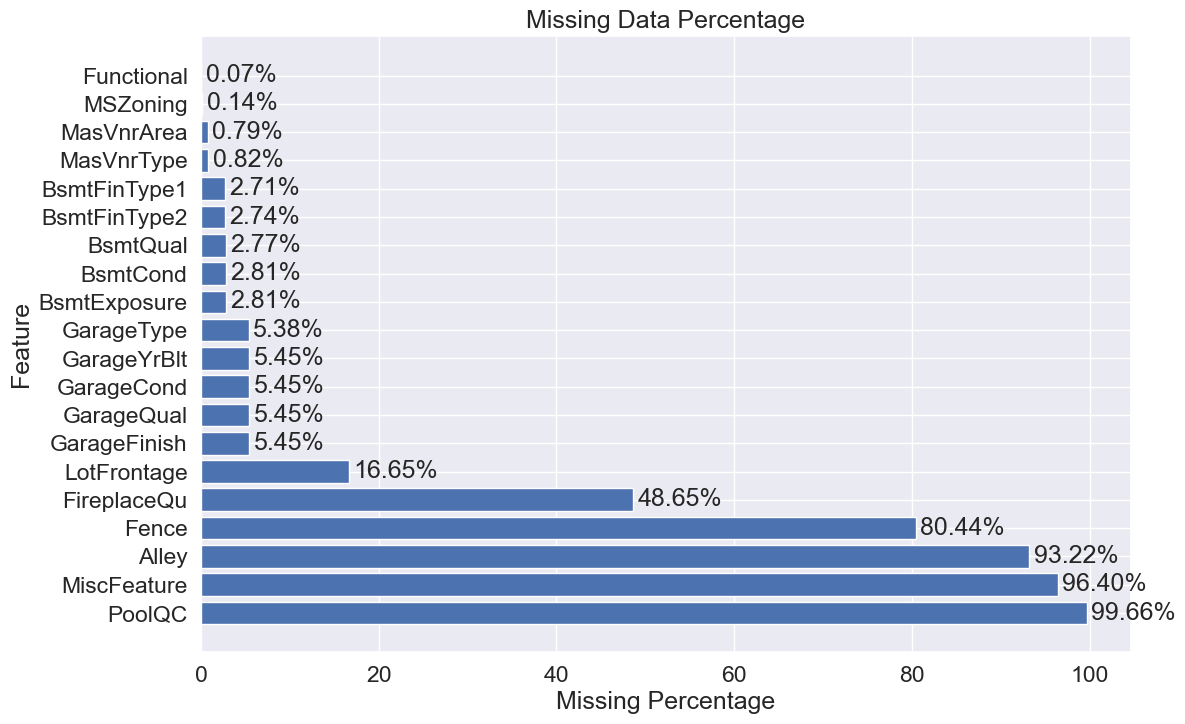

In [7]:
#Plot a bar grpah showing top 20 missing count

#Calculate missing percentage 
total = df_Ames.isnull().sum().sort_values(ascending=False)
percent = (df_Ames.isnull().sum()/df_Ames.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Select the top 20 variables with missing values
top_missing = missing_data.head(20)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(top_missing.index, top_missing['Percent'] * 100)
ax.set_xlabel('Missing Percentage')
ax.set_ylabel('Feature')
ax.set_title('Missing Data Percentage')
for i, v in enumerate(top_missing['Percent'] * 100):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.show()

In [8]:
# Handling missing values as per the data description file

# Update MiscVal to zero where MiscFeature is None
df_Ames.loc[df_Ames['MiscFeature'].isnull(), 'MiscVal'] = 0

In [9]:
#update Garage features based on GarageType, if GarageType NA , there is no Garage, hence  all Garage features updates to'NoGrg'

# List of  Garage categorical columns
categorical_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# List of  Garage numerical columns
numerical_cols = ['GarageYrBlt', 'GarageCars', 'GarageArea']

# Update Garage categorical columns where GarageType is null
df_Ames.loc[df_Ames['GarageType'].isnull(), categorical_cols] = 'NoGrge'

# Update Garage numerical columns where GarageType is null
df_Ames.loc[df_Ames['GarageType'].isnull(), numerical_cols] = 0


In [10]:
#Dealing with numerical basement features

# Fill  missing values with zero
columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
df_Ames[columns] = df_Ames[columns].fillna(0)

# Calculate TotalBsmtSF as the sum of BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF
df_Ames['TotalBsmtSF'] = df_Ames['BsmtFinSF1'] + df_Ames['BsmtFinSF2'] + df_Ames['BsmtUnfSF']


In [11]:
#dealing with basement Categorical variables 

# List all categorical basment columns
categorical_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Check if all categorical columns are null in a row
mask_all_null = df_Ames[categorical_cols].isnull().all(axis=1)

# Update rows with all null categorical values with 'NoBsmt'
df_Ames.loc[mask_all_null, categorical_cols] = 'NoBsmt'


In [12]:
#handling MasVnr features

# Calculate the mode of MasVnrType
most_common_type = df_Ames['MasVnrType'].mode().iloc[0]

# Fill missing values in MasVnrType with mode
df_Ames['MasVnrType'].fillna(most_common_type, inplace=True)

# Fill MasVnrArea with zero where MasVnrType is 'None'
df_Ames.loc[df_Ames['MasVnrType'] == 'None', 'MasVnrArea'] = 0

# Calculate the median of MasVnrArea for each MasVnrType group
median_vnr_area_by_type = df_Ames.groupby('MasVnrType')['MasVnrArea'].median()

# Fill missing values in MasVnrArea with the median value specific to each MasVnrType group
df_Ames['MasVnrArea'] = df_Ames.apply(lambda row: median_vnr_area_by_type[row['MasVnrType']] 
                                      if pd.isnull(row['MasVnrArea']) else row['MasVnrArea'], axis=1)


In [13]:
#Dealing with  MS Zoning  & Lotfrontage  

# Calculate the mode values for each 'Neighborhood' in the 'MSZoning' column
mszoning_mode = df_Ames.groupby('Neighborhood')['MSZoning'].apply(lambda x: x.mode().iloc[0])

# Map the mode values to the missing values in 'MSZoning' based on 'Neighborhood'
df_Ames['MSZoning'] = df_Ames.apply(
    lambda row: row['MSZoning'] if pd.notna(row['MSZoning']) else mszoning_mode[row['Neighborhood']],
    axis=1
)

#LotFrontage , replace with median value as its not possible to have no street infront of lot
df_Ames['LotFrontage'] = df_Ames.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))



In [14]:
#Exterior features

# Group by 'Exterior1st' and 'Exterior2nd', and get the most frequent pair
most_frequent_pair = df_Ames.groupby(['Exterior1st', 'Exterior2nd']).size().idxmax()

# Fill missing values in 'Exterior1st' and 'Exterior2nd' with the most frequent values
df_Ames['Exterior1st'].fillna(most_frequent_pair[0], inplace=True)
df_Ames['Exterior2nd'].fillna(most_frequent_pair[1], inplace=True)


In [15]:
#Dealing with Sale Type and Electrical features

# Calculate the mode for each column
electrical_mode = df_Ames['Electrical'].mode().iloc[0]
sale_type_mode = df_Ames['SaleType'].mode().iloc[0]

# Fill missing values with mode value
df_Ames['Electrical'].fillna(electrical_mode, inplace=True)
df_Ames['SaleType'].fillna(sale_type_mode, inplace=True)


In [16]:
#Dealing with KitchenQual, update missing values with mode

KitchenQual_mode= df_Ames['KitchenQual'].mode().iloc[0]
df_Ames['KitchenQual'].fillna(KitchenQual_mode, inplace=True)

In [17]:
# Dealing with PoolQC column 

# Find the mode of 'PoolQC' where 'PoolArea' is not 0
mode_poolqc = df_Ames.loc[df_Ames['PoolArea'] != 0, 'PoolQC'].mode().iloc[0]

# Fill the 'PoolQC' column with 'NoPool' where 'PoolQC' is null and 'PoolArea' is 0
df_Ames.loc[(df_Ames['PoolQC'].isnull()) & (df_Ames['PoolArea'] == 0), 'PoolQC'] = 'NoPool'

# Fill the 'PoolQC' column with the mode where 'PoolQC' is null and 'PoolArea' is not 0
df_Ames.loc[(df_Ames['PoolQC'].isnull()) & (df_Ames['PoolArea'] != 0), 'PoolQC'] = mode_poolqc

In [18]:
#create a list to handle NA values in below features,these missing values were filled based on data description file

Impute_list = [
    ('MiscFeature', 'None'),
    ('Alley', 'NoAlley'),
    ('Fence','NoFen'),
    ('FireplaceQu', 'NoFireP'),
    ('BsmtHalfBath', 0),
    ('BsmtFullBath', 0),
    ('Utilities', 'AllPub'),
    ('Functional', 'Typ'),
]

# Iterate over the impute_list
for column, value in Impute_list:
    
    # Impute missing values in the specified column with the above value
    df_Ames[column].fillna(value, inplace=True)

In [19]:

#Calculate % of missing values in the dataset to see the pending rows to handle
null_df = df_Ames.isnull().sum()[df_Ames.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df_Ames)*100,2)
null_df["Feature Data Type"] = df_Ames[null_df.index.tolist()].dtypes
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtFinType2                     1                 0.03            object
GarageCars                       1                 0.03           float64
GarageArea                       1                 0.03           float64
BsmtQual                         2                 0.07            object
GarageFinish                     2                 0.07            object
GarageQual                       2                 0.07            object
GarageCond                       2                 0.07            object
BsmtCond                         3                 0.10            object
BsmtExposure                     3                 0.10            object
GarageYrBlt                    159                 5.45           float64

In [20]:
#Fill GarageYrBlt to 0 if house doesnt have Garage
df_Ames.loc[df_Ames['GarageType'] == 'NoGrge', 'GarageYrBlt'] = 0


In [21]:
# Remaining rows in GarageYrBlt handled based on below;

# Calculate the median of GarageYrBlt for rows where GarageType is 'Detchd'
median_garageyrblt_dtchd = df_Ames.loc[df_Ames['GarageType'] == 'Detchd', 'GarageYrBlt'].median()

# Fill missing values in 'GarageYrBlt'  with median where GarageType is 'Detchd'
df_Ames.loc[(df_Ames['GarageType'] == 'Detchd') & (df_Ames['GarageYrBlt'].isnull()), 'GarageYrBlt'] = median_garageyrblt_dtchd

# Calculate the mode of GarageFinish for rows where GarageType is 'Detchd'
mode_garagefinish_dtchd = df_Ames.loc[df_Ames['GarageType'] == 'Detchd', 'GarageFinish'].mode().iloc[0]

# Fill missing values in 'GarageFinish' where GarageType is 'Detchd' with the mode value
df_Ames.loc[(df_Ames['GarageType'] == 'Detchd') & (df_Ames['GarageFinish'].isnull()), 'GarageFinish'] = mode_garagefinish_dtchd

# Calculate the mode of GarageQual for rows where GarageType is 'Detchd'
mode_garagequal_dtchd = df_Ames.loc[df_Ames['GarageType'] == 'Detchd', 'GarageQual'].mode().iloc[0]

# Fill missing values in 'GarageQual' where GarageType is 'Detchd' with the mode value
df_Ames.loc[(df_Ames['GarageType'] == 'Detchd') & (df_Ames['GarageQual'].isnull()), 'GarageQual'] = mode_garagequal_dtchd

# Calculate the mode of GarageCond for rows where GarageType is 'Detchd'
mode_garagecond_dtchd = df_Ames.loc[df_Ames['GarageType'] == 'Detchd', 'GarageCond'].mode().iloc[0]

# Fill missing values in 'GarageCond' where GarageType is 'Detchd' with the mode value
df_Ames.loc[(df_Ames['GarageType'] == 'Detchd') & (df_Ames['GarageCond'].isnull()), 'GarageCond'] = mode_garagecond_dtchd


In [22]:
#Calculate % of missing values in the dataset to see the pending rows to handle
null_df = df_Ames.isnull().sum()[df_Ames.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df_Ames)*100,2)
null_df["Feature Data Type"] = df_Ames[null_df.index.tolist()].dtypes
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtFinType2                     1                 0.03            object
GarageCars                       1                 0.03           float64
GarageArea                       1                 0.03           float64
BsmtQual                         2                 0.07            object
BsmtCond                         3                 0.10            object
BsmtExposure                     3                 0.10            object

In [23]:
#Dealing with Garage Cars 

# Calculate the median of GarageCars for rows where GarageType is 'Detchd'
median_garagecars= df_Ames.loc[df_Ames['GarageType'] == 'Detchd', 'GarageCars'].median()

# Fill missing values in 'GarageCars' where GarageType is 'Detchd' with the median value
df_Ames.loc[(df_Ames['GarageType'] == 'Detchd') & (df_Ames['GarageCars'].isnull()), 'GarageCars'] = median_garagecars

# Calculate the median of GarageArea for the rows where GarageType is 'Detchd'
median_garagearea= df_Ames.loc[df_Ames['GarageType'] == 'Detchd', 'GarageArea'].median()

# Fill missing values in 'GarageArea' where GarageType is 'Detchd' with the median value
df_Ames.loc[(df_Ames['GarageType'] == 'Detchd') & (df_Ames['GarageArea'].isnull()), 'GarageArea'] = median_garagearea


In [24]:
#Calculate % of missing values in the dataset to see the pending rows to handle
null_df = df_Ames.isnull().sum()[df_Ames.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df_Ames)*100,2)
null_df["Feature Data Type"] = df_Ames[null_df.index.tolist()].dtypes
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtFinType2                     1                 0.03            object
BsmtQual                         2                 0.07            object
BsmtCond                         3                 0.10            object
BsmtExposure                     3                 0.10            object

In [25]:
#Fill remaining missing numerical columns with zero

df_Ames['BsmtFinType2'] = df_Ames['BsmtFinType2'].fillna(0)
#BsmtExposure
df_Ames['BsmtExposure'].fillna(df_Ames['BsmtExposure'].mode().iloc[0], inplace=True)
#BsmtQual
df_Ames['BsmtQual'].fillna(df_Ames['BsmtQual'].mode().iloc[0], inplace=True)
#BsmtCond
df_Ames['BsmtCond'].fillna(df_Ames['BsmtCond'].mode().iloc[0], inplace=True)

In [26]:
#Checking the missing value again
print("Total Missing Values Left is:",df_Ames.isnull().sum().sum())

Total Missing Values Left is: 0


# Descriptive  Data Analysis

In [27]:

df_Ames.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.542994   10168.114080     6.089072   
std     842.787043    42.517628    21.703256    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    60.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    70.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2919.000000  2919.000000   
mean      5.564577  1971.312778   1984.264474   100.906132   441.272011   
std       1.113131    30.291442     20.894344   178.730216   455.606014   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.000000   
75%       6.000000  2001.000000   2004.000000   162.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean     49.565262   560.579993  1051.417266  1159.581706   336.483727   
std     169.179104   439.590889   441.120498   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.000000  1082.000000     0.000000   
75%       0.000000   805.000000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2919.000000   2919.000000  2919.000000   
mean       4.694416  1500.759849      0.429599      0.061322     1.568003   
std       46.396825   506.051045      0.524676      0.245608     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean   1871.708462     1.766701   472.849435    93.709832    47.486811   
std     447.016804     0.761506   215.362186   126.526589    67.575493   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1957.000000     1.000000   320.000000     0.000000     0.000000   
50%    1977.000000     2.000000   480.000000     0.000000    26.000000   
75%    2001.000000     2.000000   576.000000   168.000000    70.000000   
max    2

# Inferential Data Analysis

In [28]:
#Hypothesis Testing - T Test whether there is a significant difference in the average SalePrice 
#for houses with and without a garage.

# Extract SalePrice for houses with and without a garage
price_with_garage = df_Ames[df_Ames["GarageType"] != "NoGrge"]["SalePrice"]
price_without_garage = df_Ames[df_Ames["GarageType"] == "NoGrge"]["SalePrice"]

# Perform a two-sample t-test for means
t_statistic, p_value = ttest_ind(price_with_garage, price_without_garage)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in SalePrice between houses with and without a garage.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in SalePrice between houses with and without a garage.")
    
print("P-value:", p_value)
print("T-statistic:", t_statistic)


Reject the null hypothesis: There is a significant difference in SalePrice between houses with and without a garage.
P-value: 4.094374703119721e-20
T-statistic: 9.253175575334266


In [29]:
#ANOVA Test to check if there is any significant difference in average sale price among neighborhood

# Group SalePrice by Neighborhood
neighborhoods = df_Ames["Neighborhood"].unique()
neighborhood_groups = [df_Ames[df_Ames["Neighborhood"] == neighborhood]["SalePrice"] for neighborhood in neighborhoods]

# Perform ANOVA
f_statistic, p_value = f_oneway(*neighborhood_groups)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average SalePrice among different neighborhoods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average SalePrice among different neighborhoods.")
    
print("P-value:", p_value)
print("F-statistic:", f_statistic)


Reject the null hypothesis: There is a significant difference in average SalePrice among different neighborhoods.
P-value: 1.3384760811232094e-190
F-statistic: 48.13298755921185


# Exploratory data analysis (EDA)

Skewness: 2.549248
Kurtosis: 14.665036


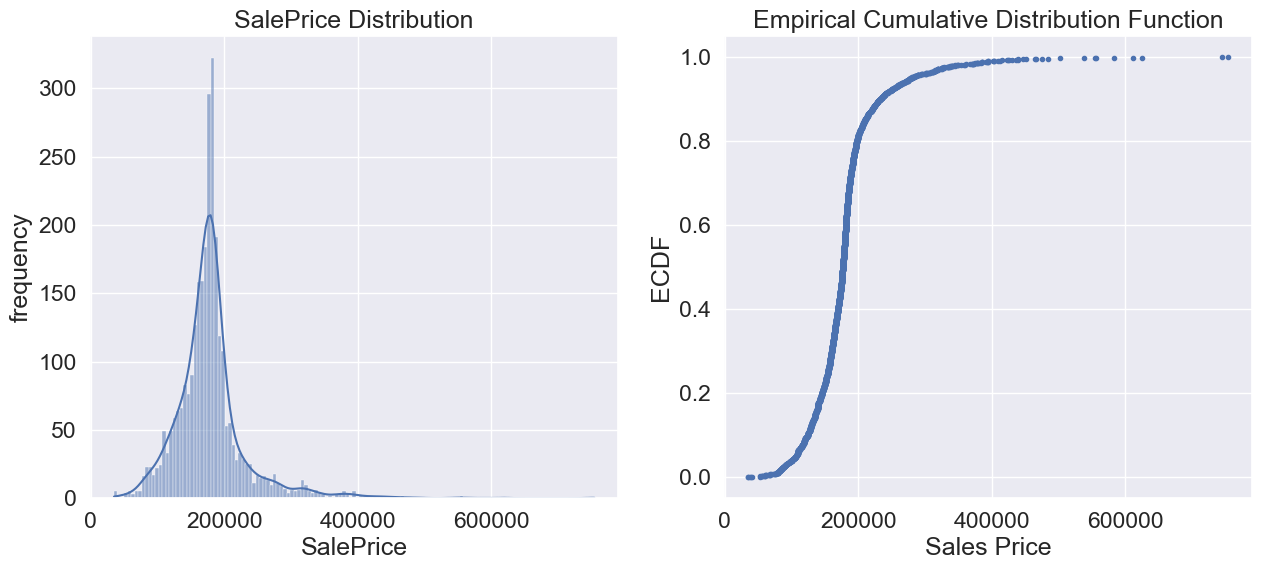

In [30]:
#checking the distribution of 'SalePrice'
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

sns.histplot(x='SalePrice', data=df_Ames, kde=True, ax=ax1)
ax1.set(ylabel = 'frequency')
ax1.set(xlabel = 'SalePrice')
ax1.set(title = 'SalePrice Distribution');

# Compute the empirical cumulative distribution function (ECDF)
sorted_prices = np.sort(df_Ames['SalePrice'])
ecdf = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)

# Create the ECDF plot
ax2.plot(sorted_prices, ecdf, marker='.', linestyle='none')
ax2.set(xlabel='Sales Price')
ax2.set(ylabel='ECDF')
ax2.set (title='Empirical Cumulative Distribution Function');

#skewness and kurtosis
print("Skewness: %f" % df_Ames['SalePrice'].skew())
print("Kurtosis: %f" % df_Ames['SalePrice'].kurt())

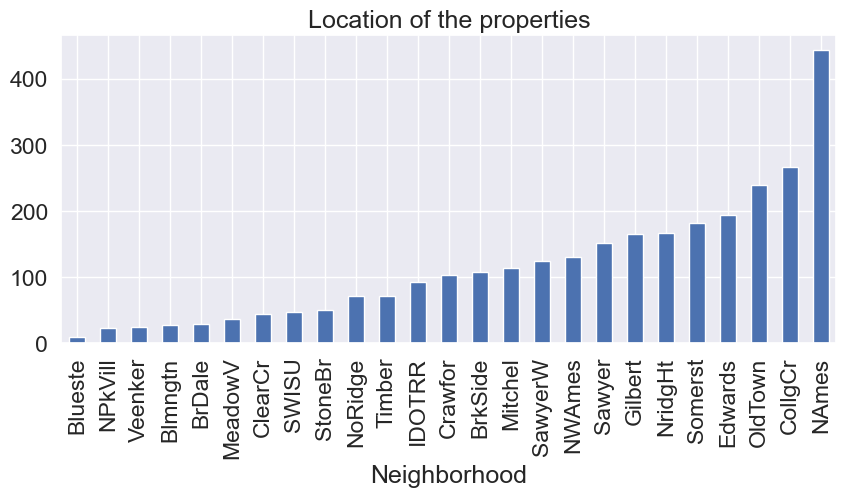

In [31]:
#Checking the location of the houses sold
df_Ames.groupby(['Neighborhood']).Id.count().sort_values().plot(kind='bar',figsize=(10,4))
plt.title('Location of the properties')
plt.show()

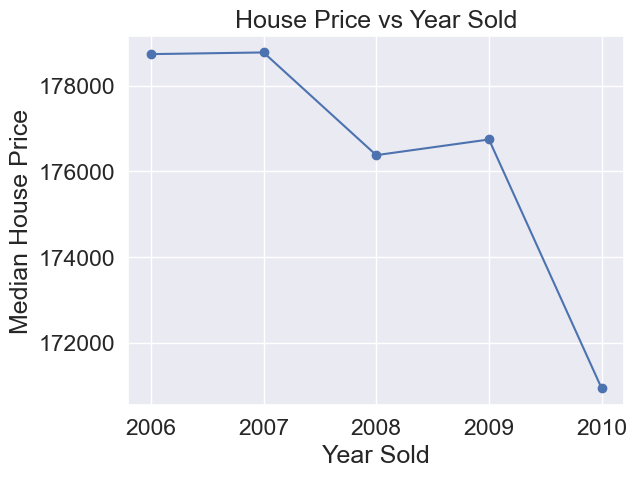

In [32]:
#Lets look at the trend in House prices

#check whether there is a relation between year the house is sold and the sales price
median_prices = df_Ames.groupby('YrSold')['SalePrice'].median()
plt.plot(median_prices.index, median_prices.values, marker='o', linestyle='-')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Sold")
plt.show()

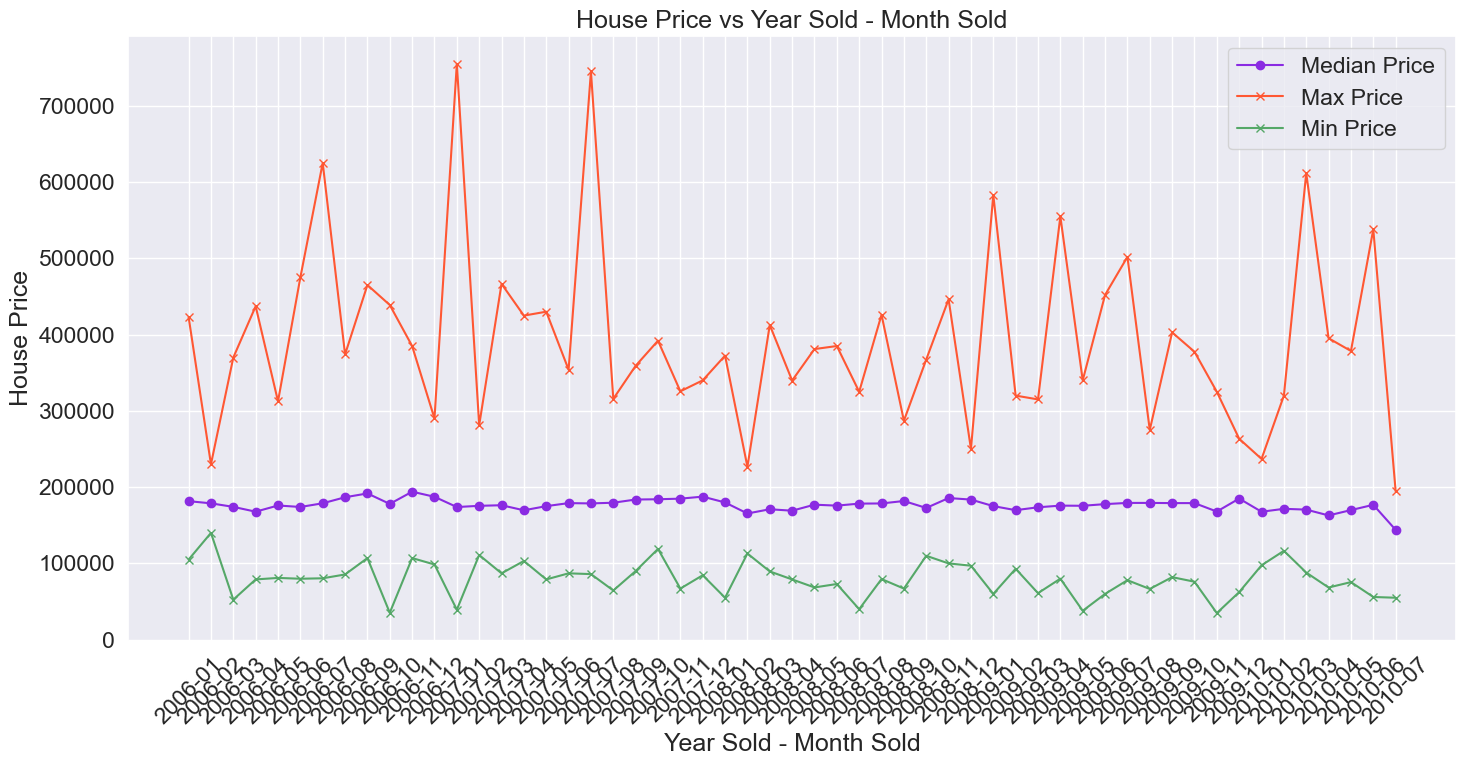

In [33]:
#Display Min,Max and Median house price with respect to month and year

median_prices_by_year_month = df_Ames.groupby(['YrSold', 'MoSold'])['SalePrice'].median()
max_prices_by_year_month = df_Ames.groupby(['YrSold', 'MoSold'])['SalePrice'].max()
min_prices_by_year_month = df_Ames.groupby(['YrSold', 'MoSold'])['SalePrice'].min()

year_month_strings = [f'{year}-{month:02d}' for year, month in median_prices_by_year_month.index]
plt.figure(figsize=(15, 8))

plt.plot(year_month_strings, median_prices_by_year_month.values, marker='o', linestyle='-', color='#8A2BE2', label='Median Price')
plt.plot(year_month_strings, max_prices_by_year_month.values, marker='x', linestyle='-', color='#FF5733', label='Max Price')
plt.plot(year_month_strings, min_prices_by_year_month.values, marker='x', linestyle='-', color='g', label='Min Price')
plt.xlabel('Year Sold - Month Sold')
plt.ylabel('House Price')
plt.title("House Price vs Year Sold - Month Sold")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()


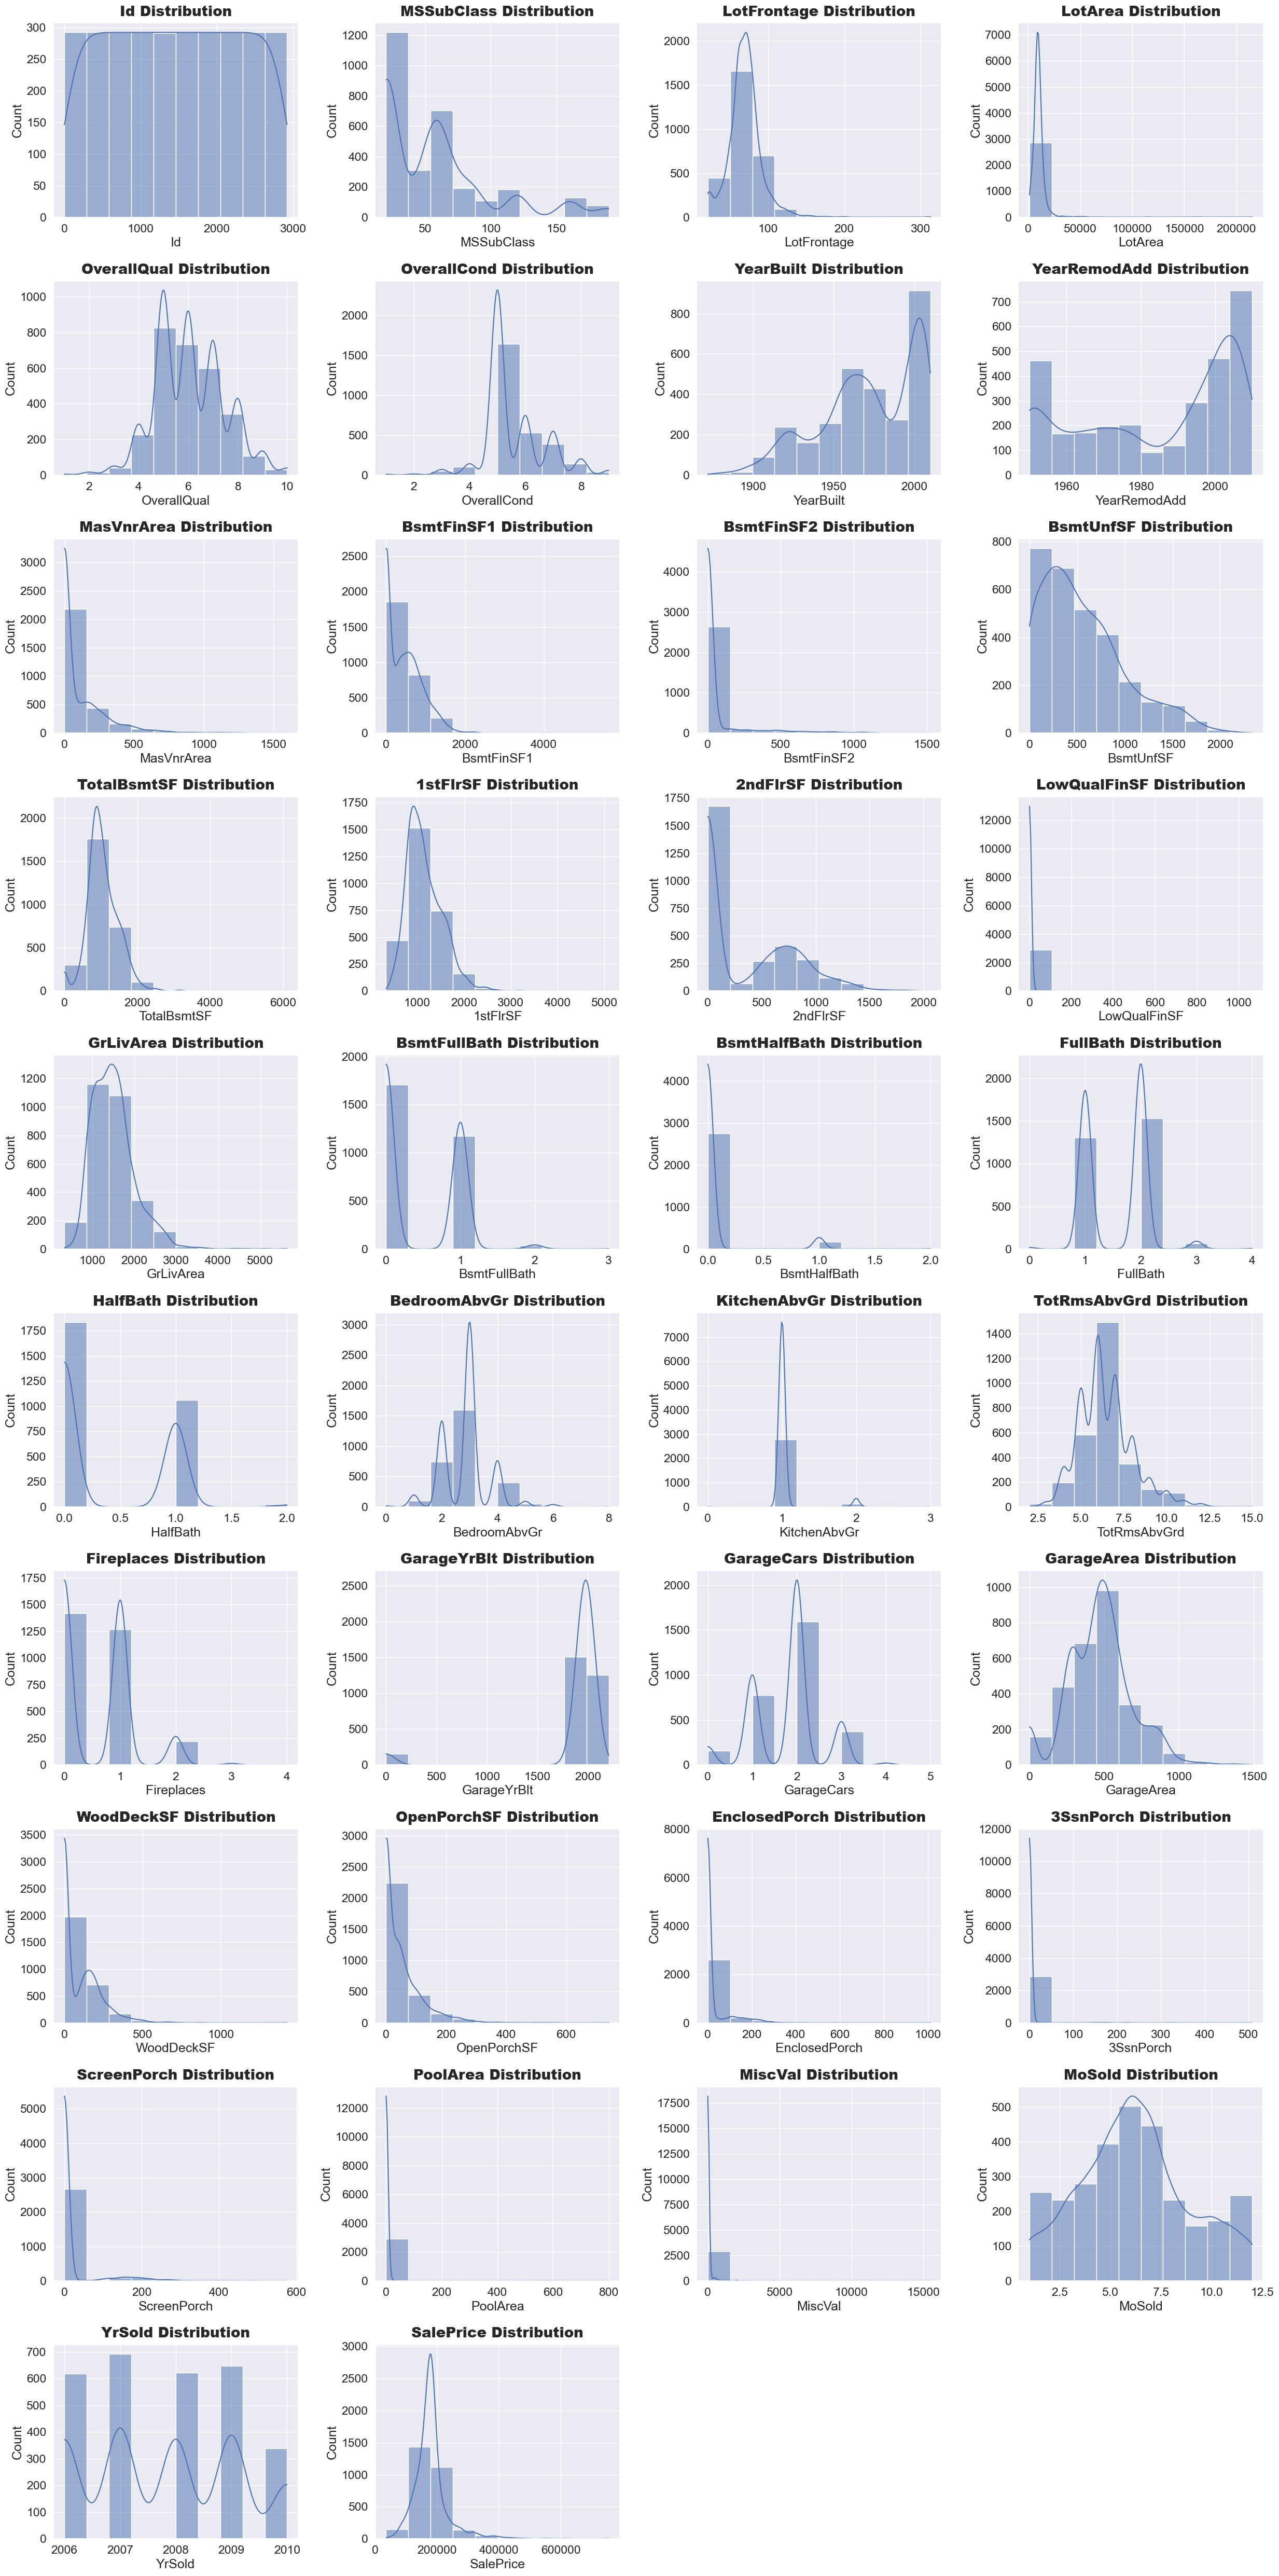

In [34]:
#Visualise numerical features distribution in the dataset
numerical_attributes = df_Ames.select_dtypes(include=['int64', 'float64'])
num_features = numerical_attributes.shape[1]
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

plt.figure(figsize=(25, 5 * num_rows))
for index, column in enumerate(numerical_attributes.columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(df_Ames[column], bins=10, kde=True)
    plt.title(f"{column} Distribution", fontweight="black", size=20, pad=10)
    plt.tight_layout()

plt.savefig('numerical_features_distribution.jpg')
plt.show()

In [35]:
#Visualizing Categorical Features Vs SalePrice.
cat_cols = df_Ames.select_dtypes(include="object").columns.tolist()
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=df_Ames)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

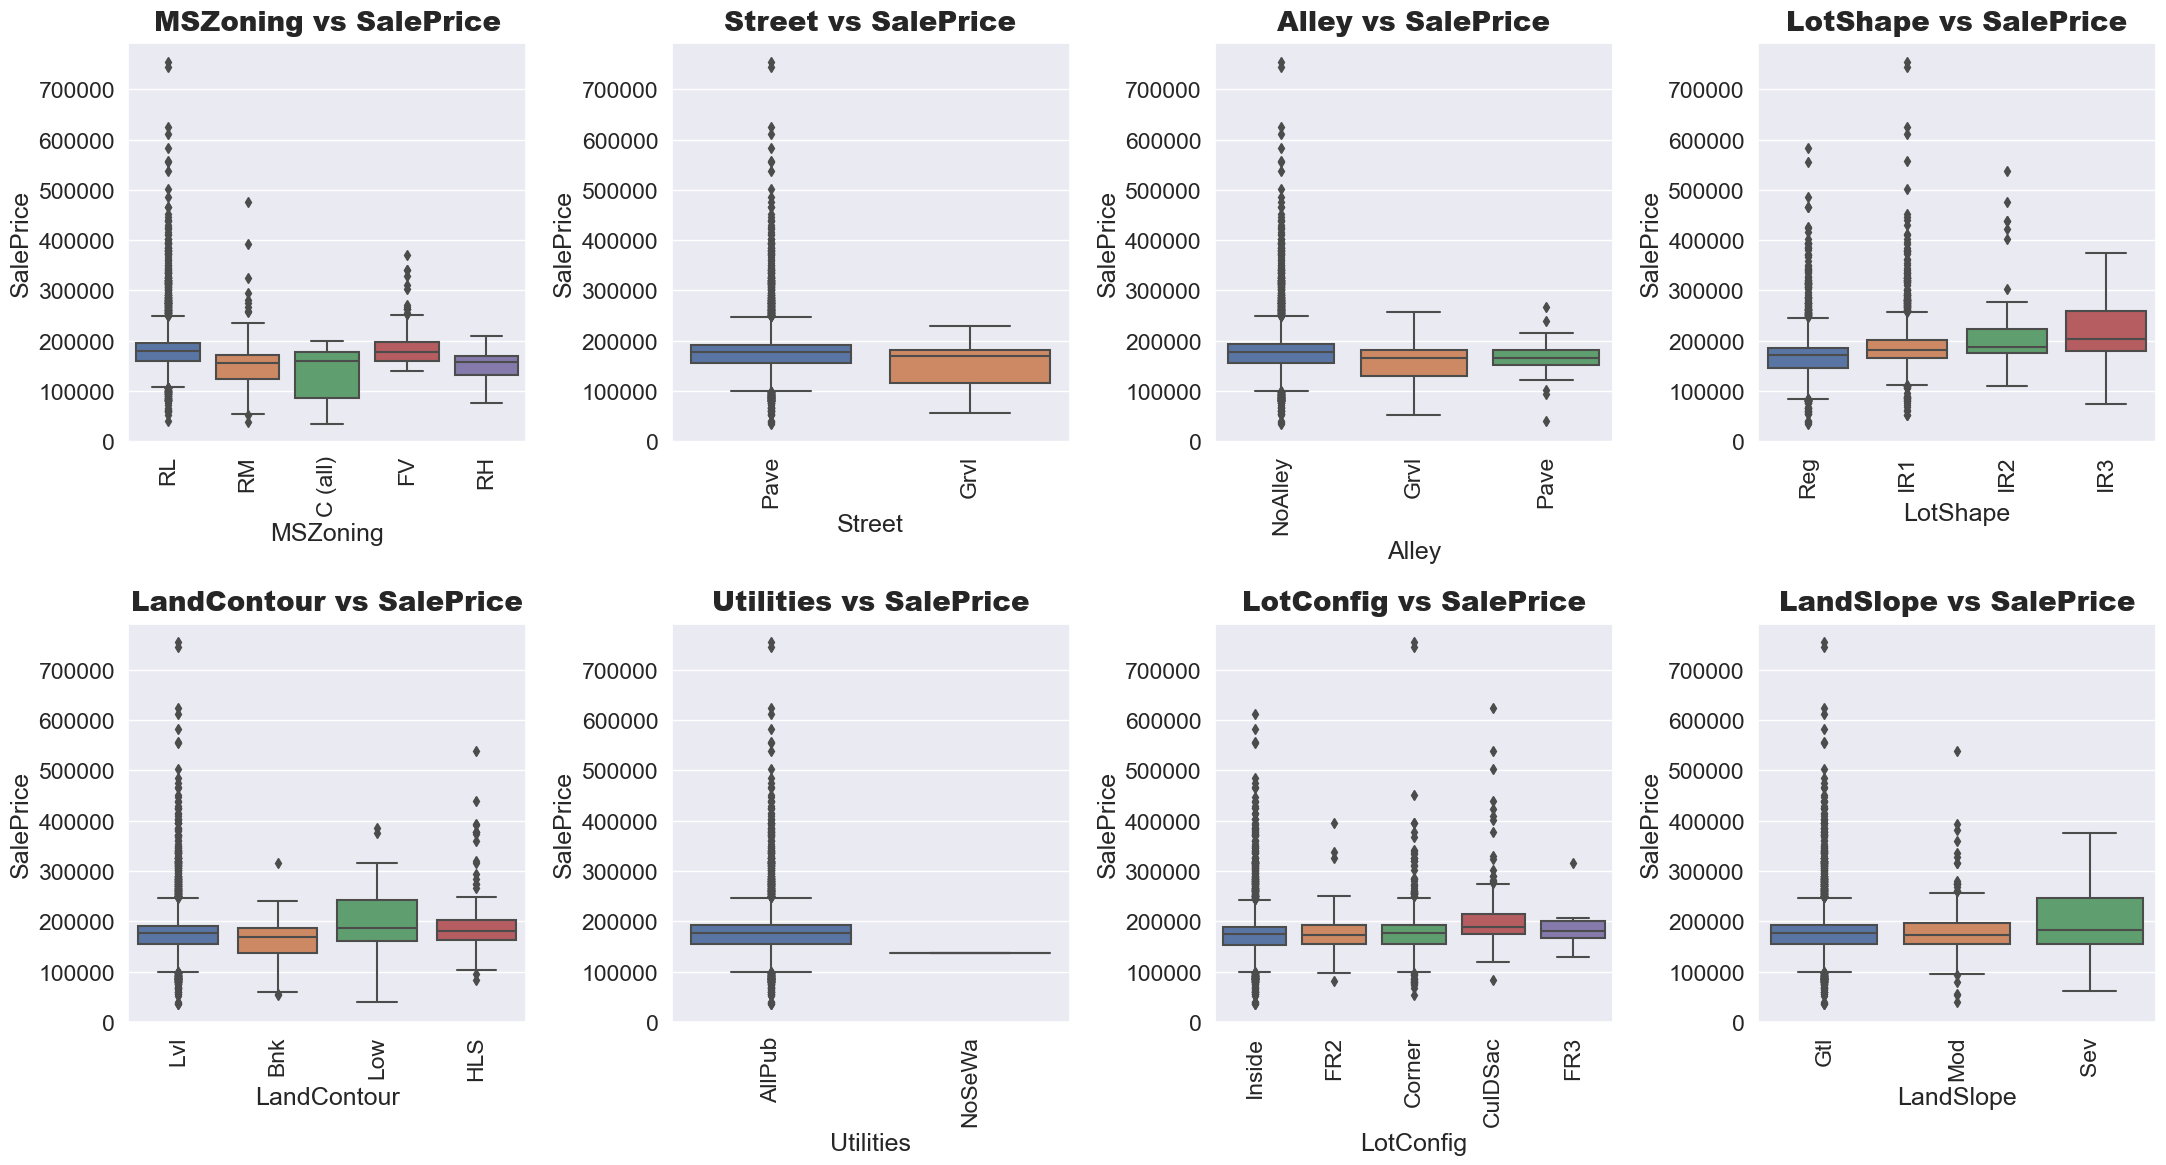

In [36]:
boxplot(cat_cols[0:8])

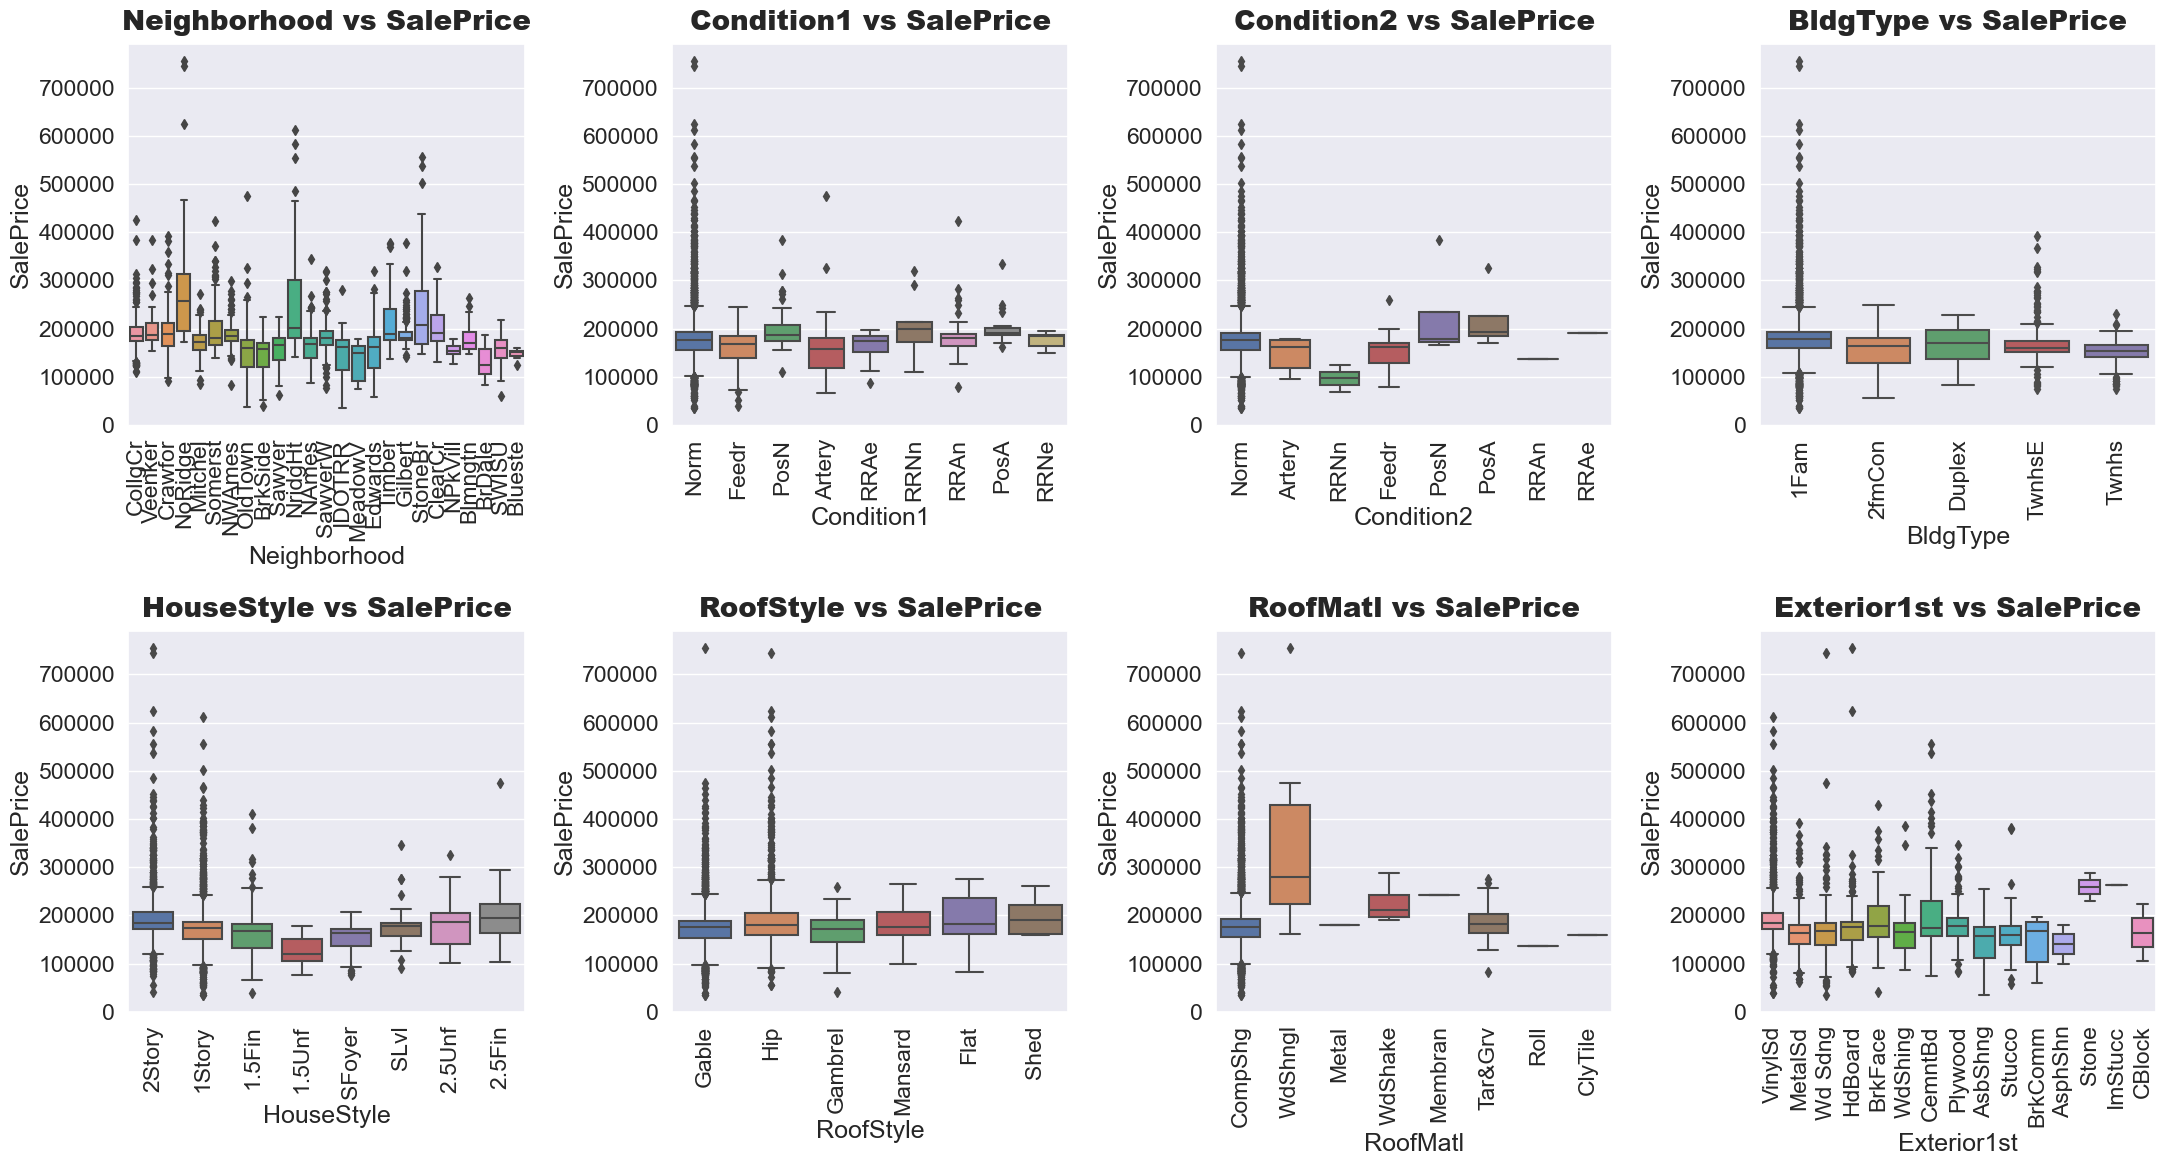

In [37]:
boxplot(cat_cols[8:16])

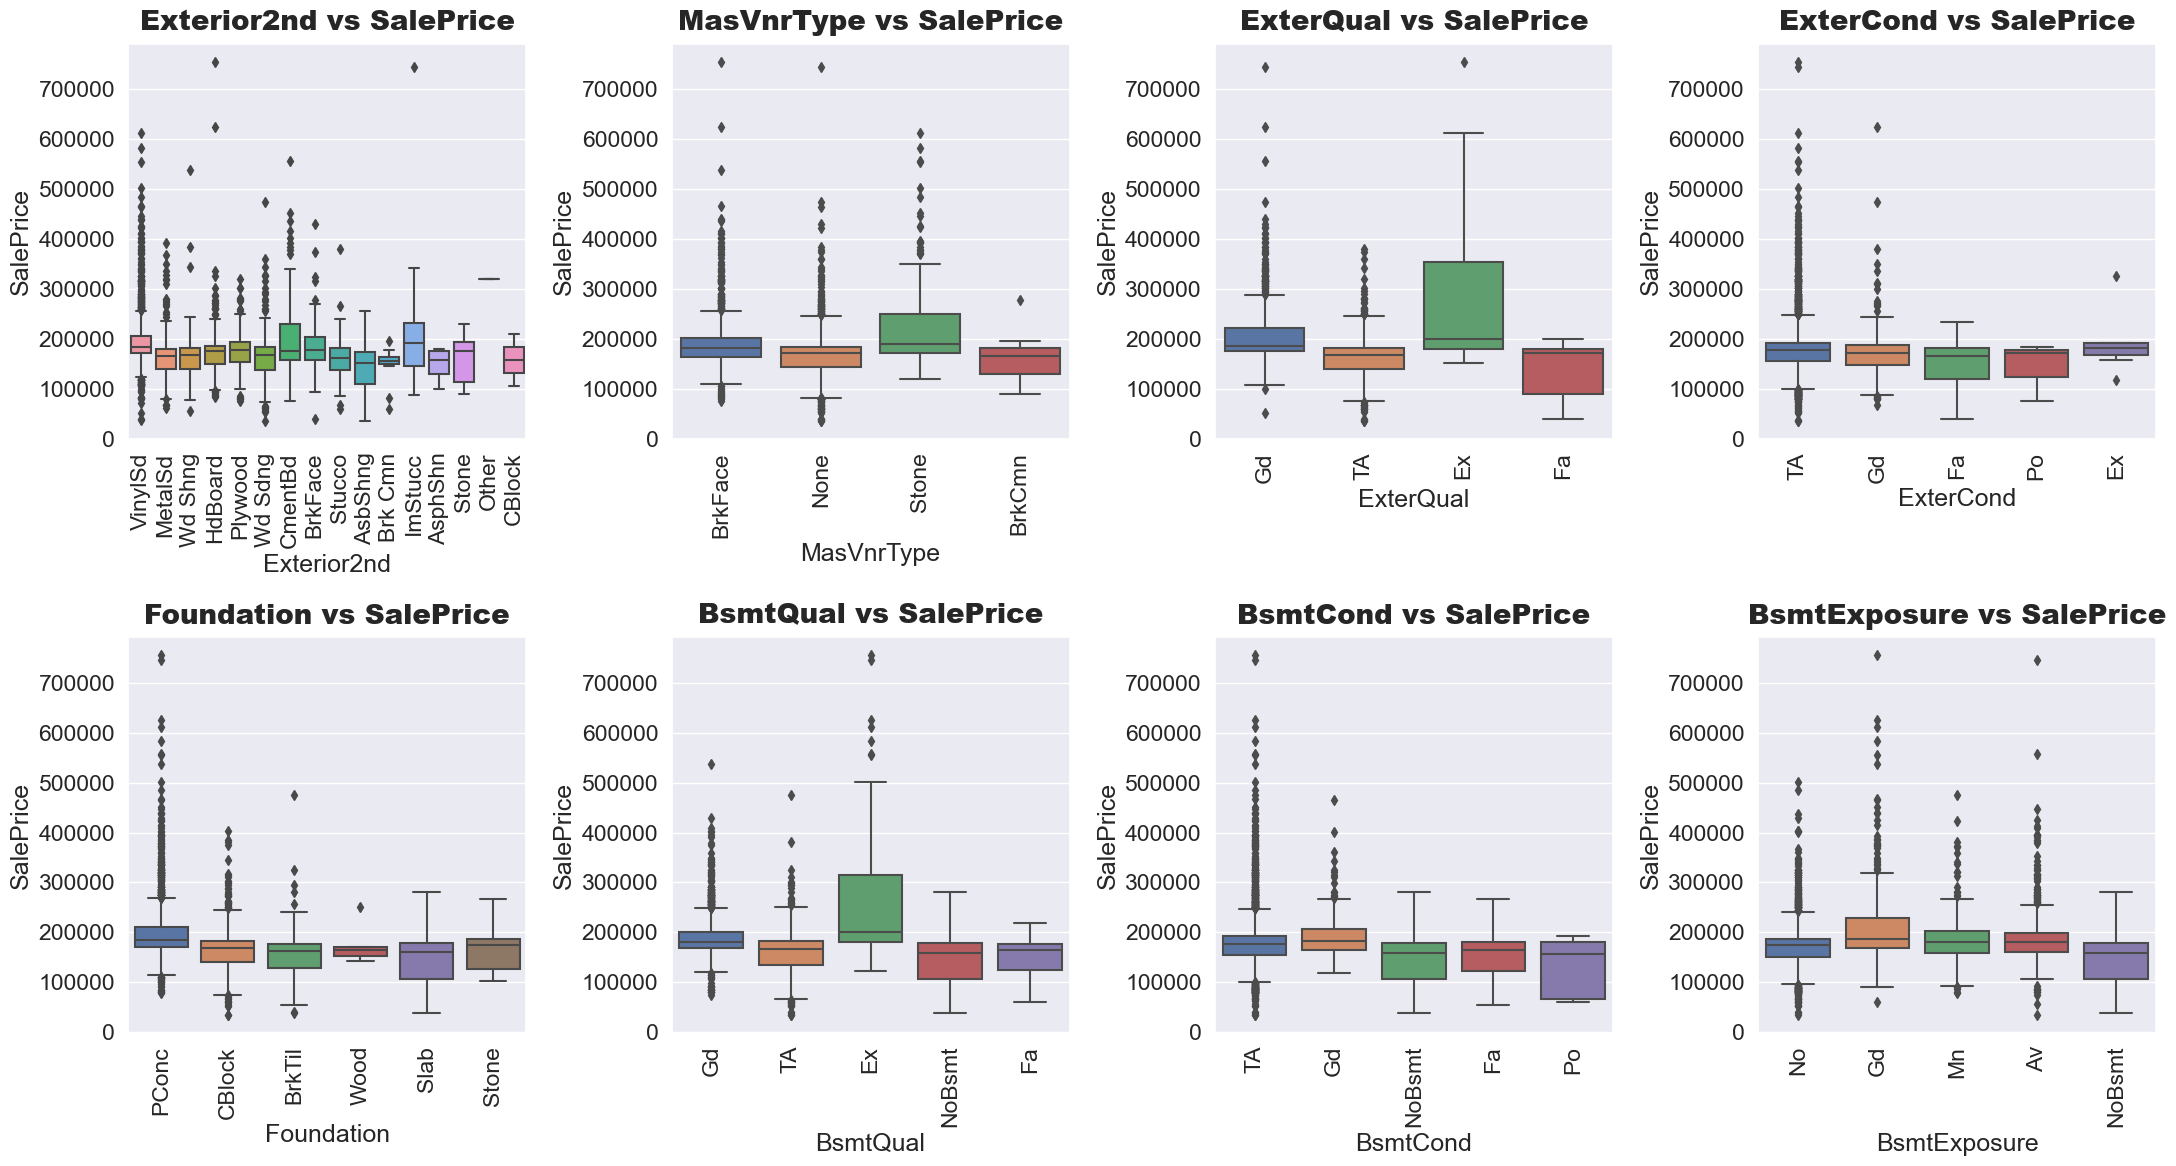

In [38]:
boxplot(cat_cols[16:24])

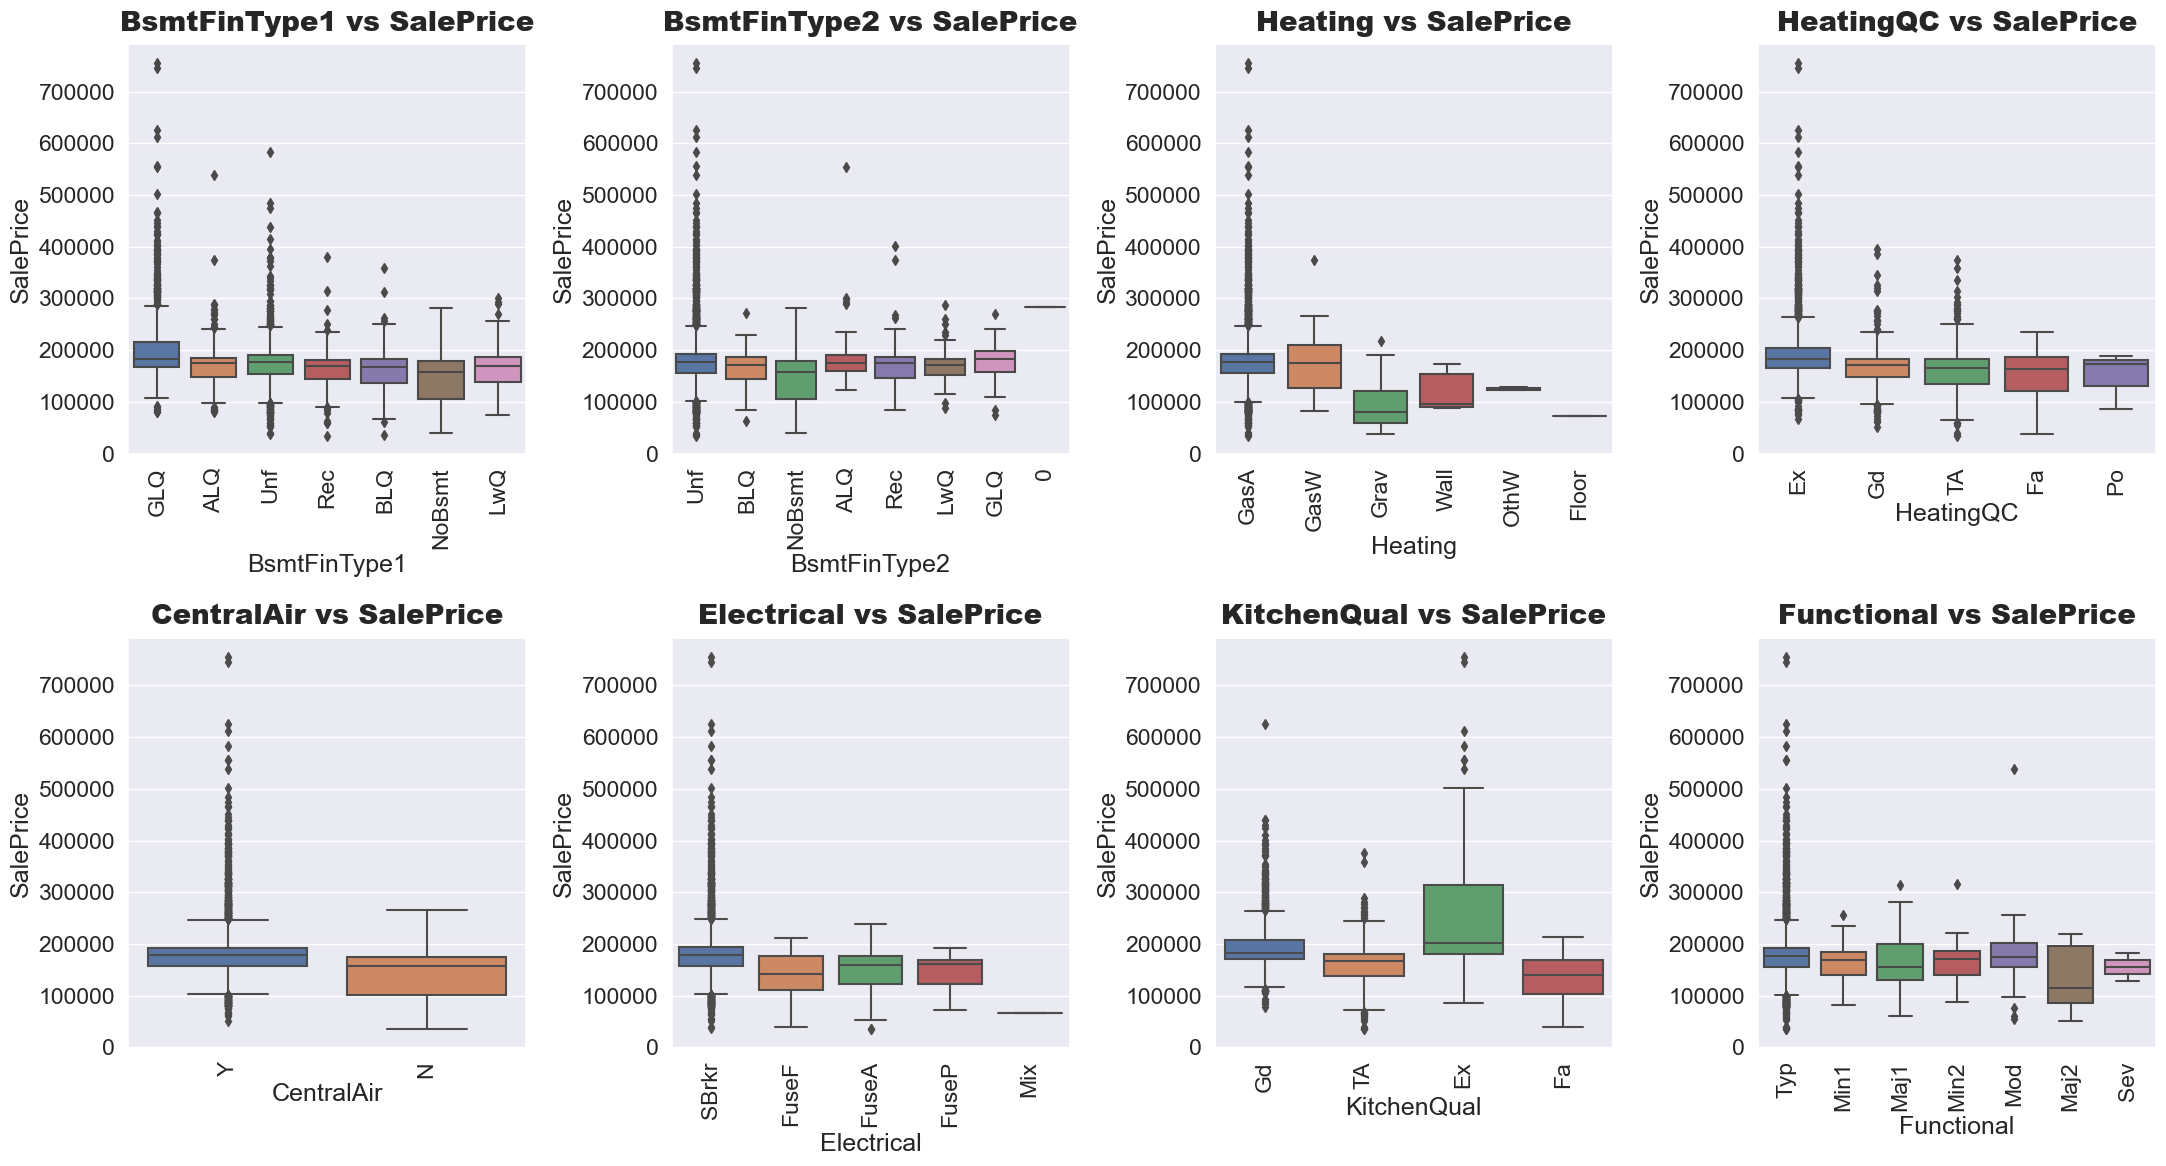

In [39]:
boxplot(cat_cols[24:32])

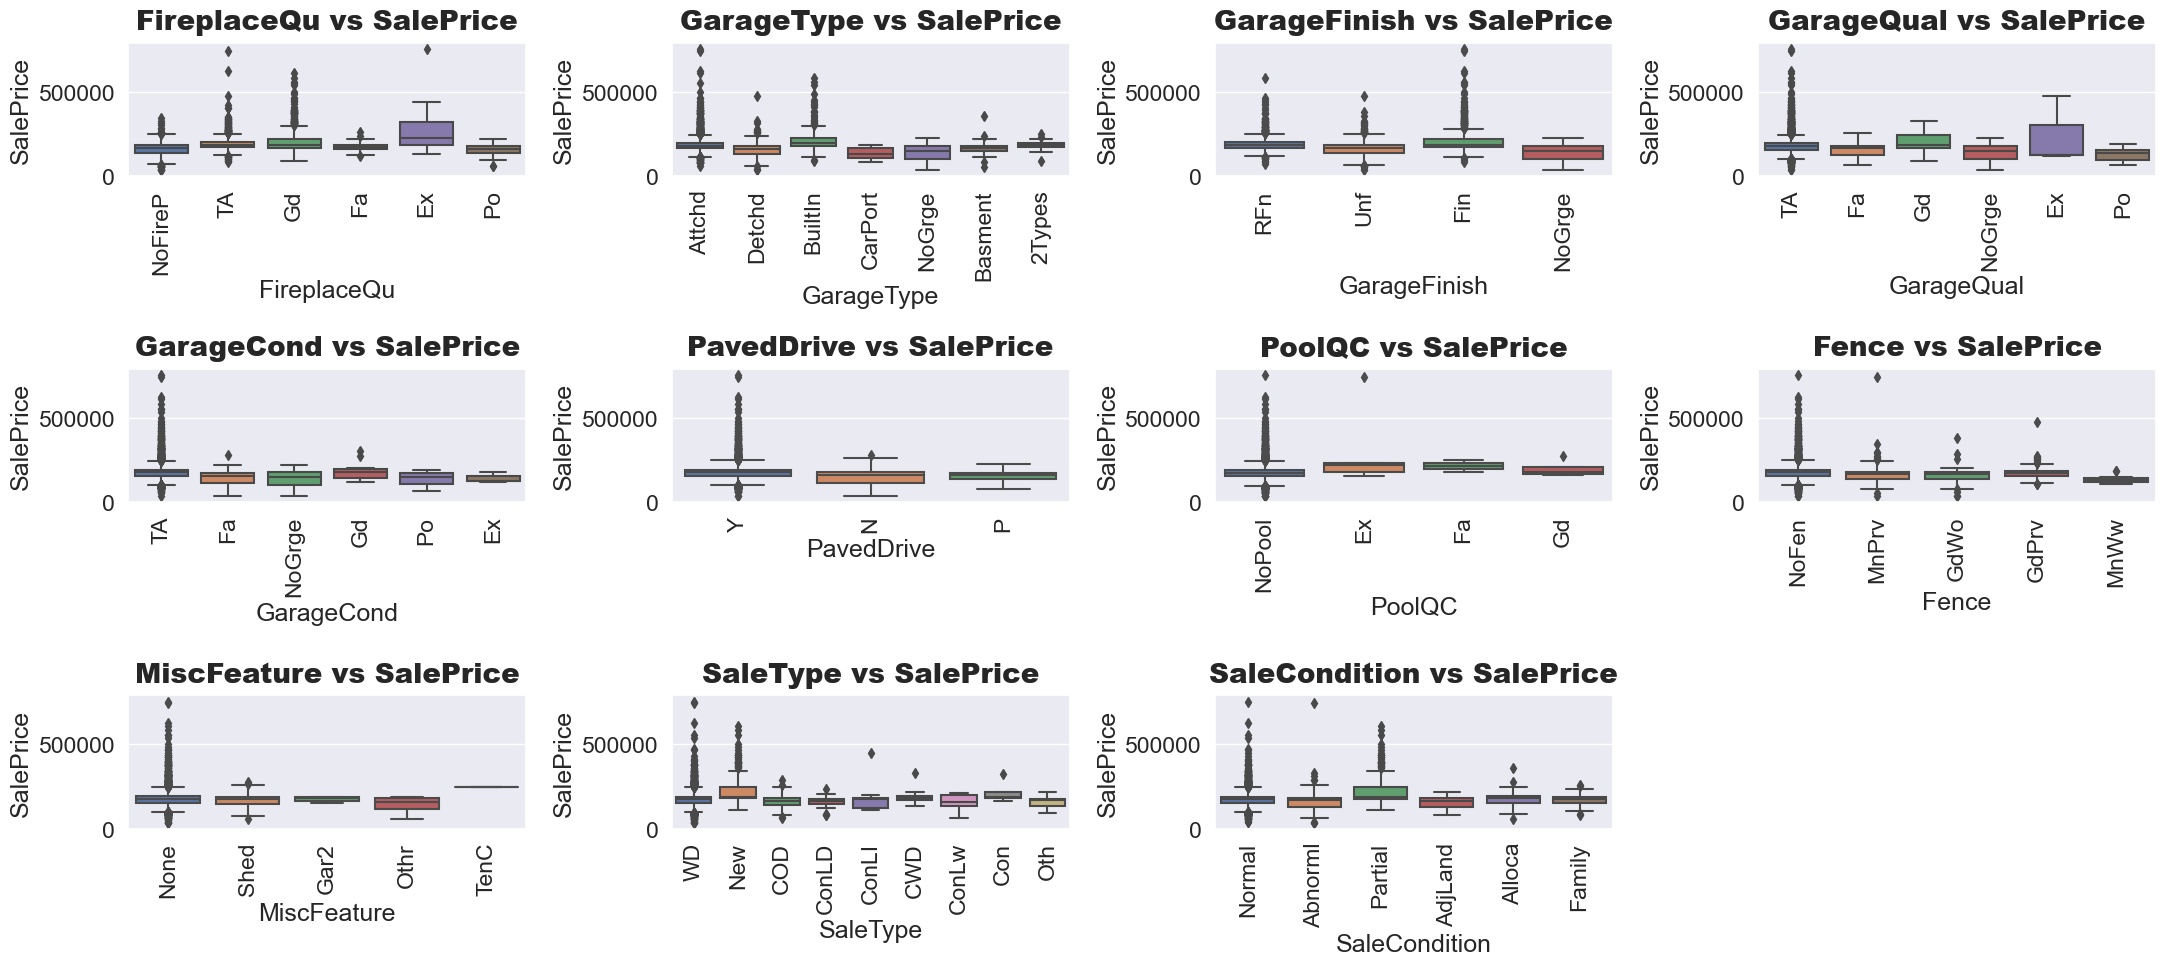

In [40]:
plt.figure(figsize=(22,12))
for index,column in enumerate(cat_cols[32:]):
    plt.subplot(4,4,index+1)
    sns.boxplot(x=column, y="SalePrice", data=df_Ames)
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [41]:
#Dropping Street ,Utilities & RoofMtl Since it has lot of imbalances as seen in categorical visualisation
df_Ames.drop(columns=["Utilities","Street"],inplace=True)
df_Ames.drop(columns=["RoofMatl"],inplace=True)

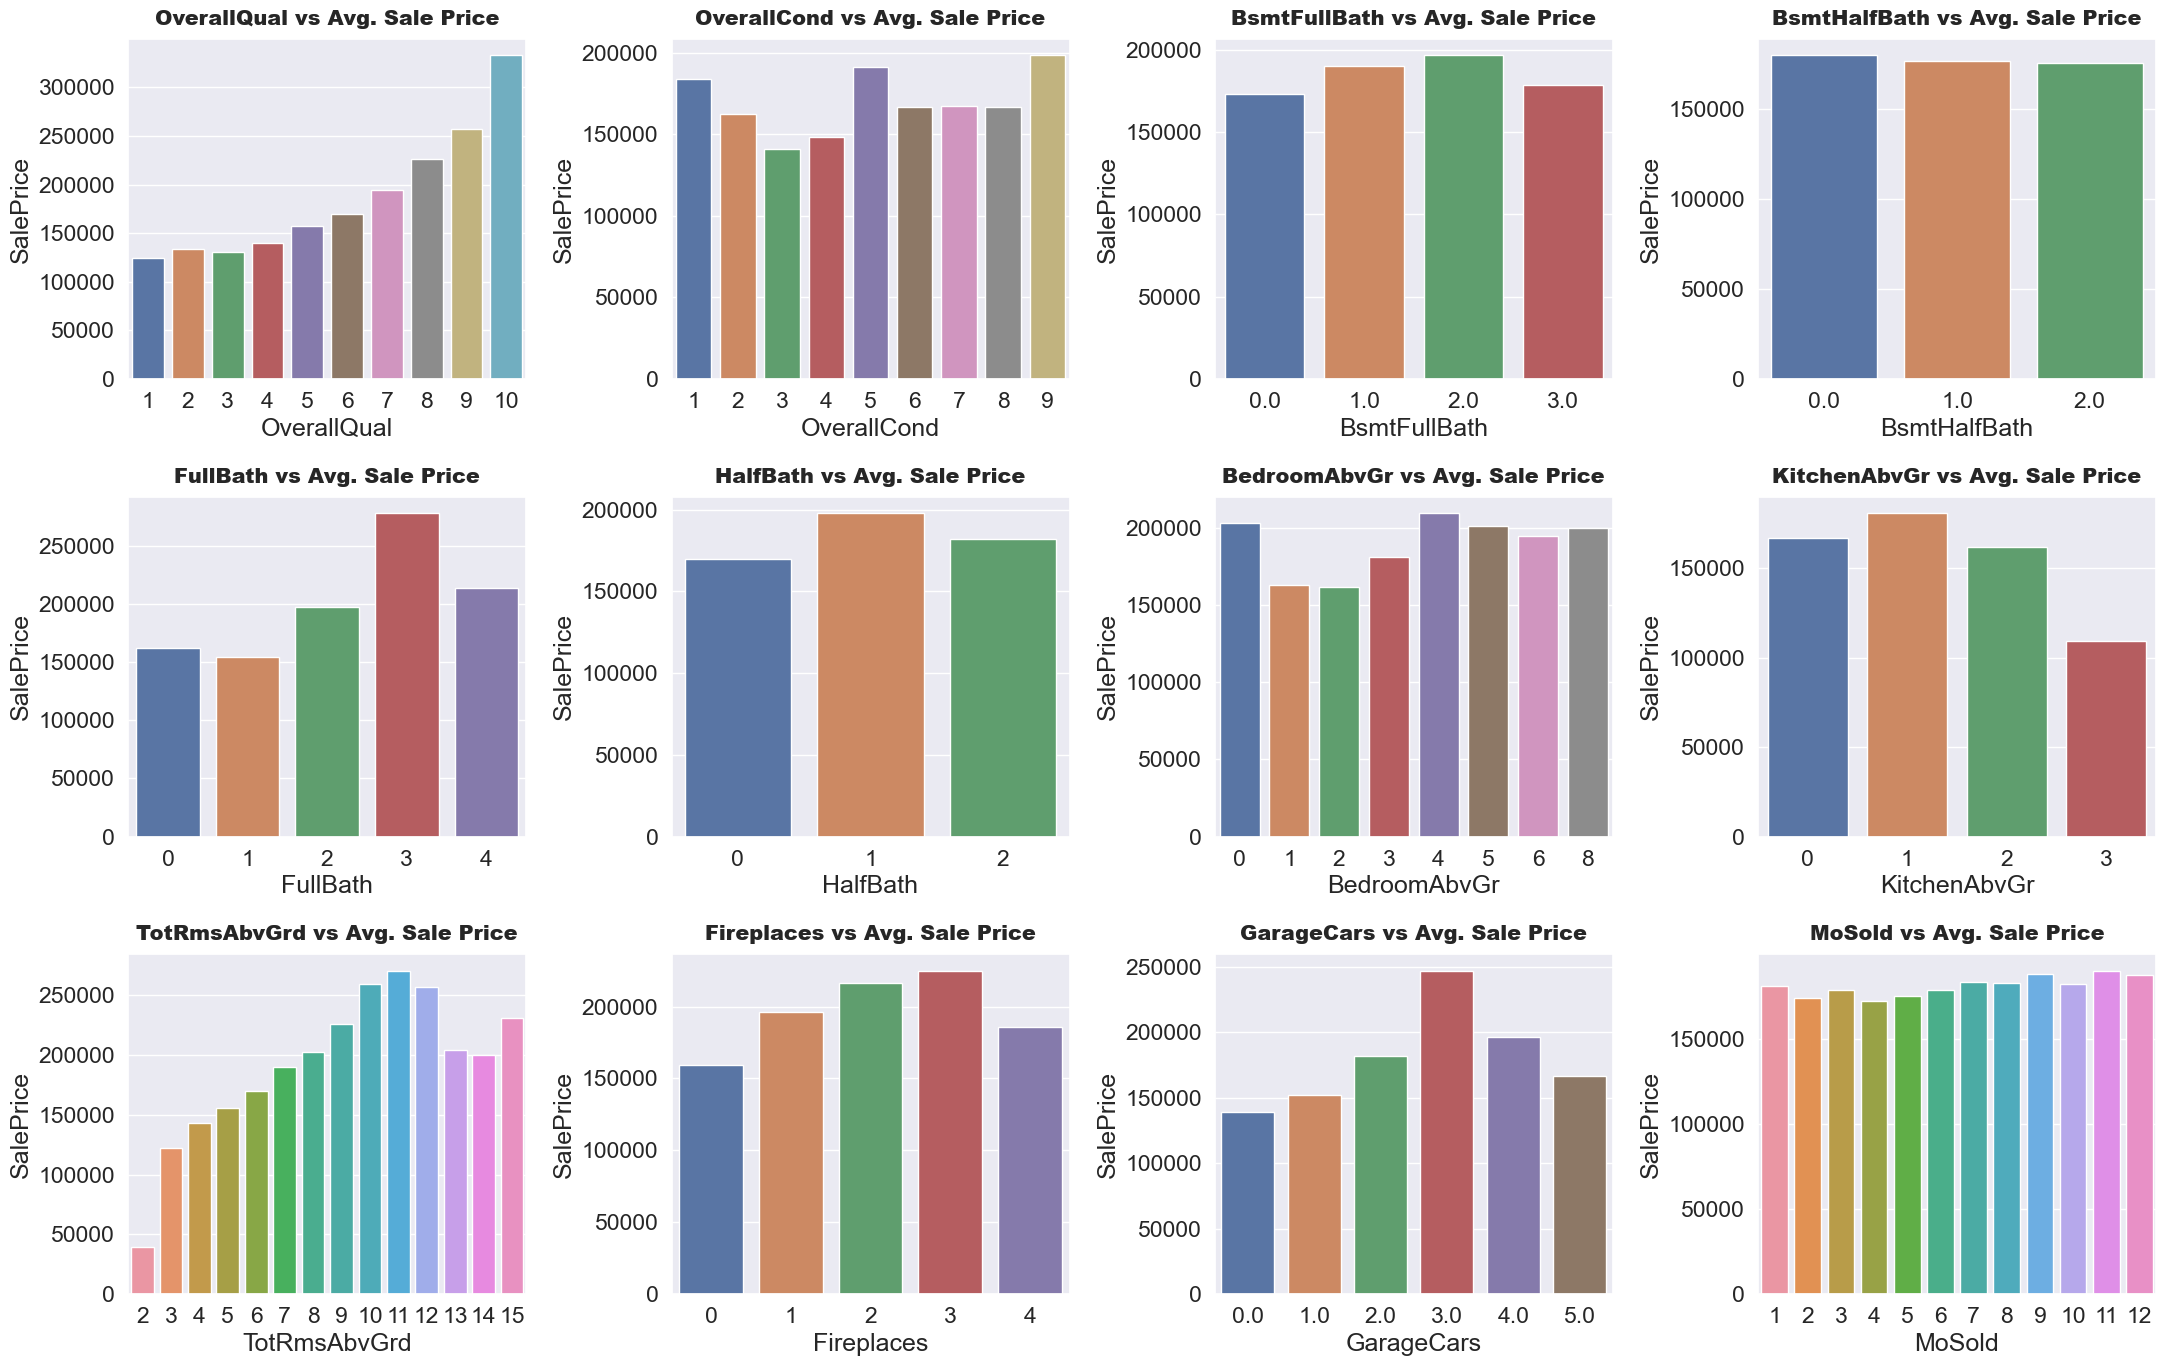

In [42]:
#Visualizing Discrete Numerical Features Vs Average "SalePrice"
dis_cols = ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold"]

plt.figure(figsize=(22,14))
for index,column in enumerate(dis_cols):
    data = df_Ames.groupby(column)["SalePrice"].mean()
    plt.subplot(3,4,index+1)
    sns.barplot(x=data.index,y= data)
    plt.title(f"{column} vs Avg. Sale Price",fontweight="black",size=15,pad=10)
    plt.tight_layout()

# Outlier analysis

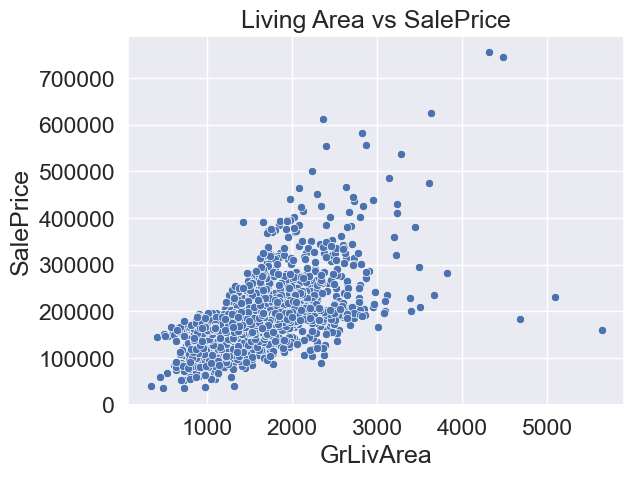

In [43]:
#scatter plot GrLivArea/SalePrice
#Houses with Large living area where sold at lower price, so removed houses which has living area more than 4000SF
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_Ames)
plt.title('Living Area vs SalePrice');

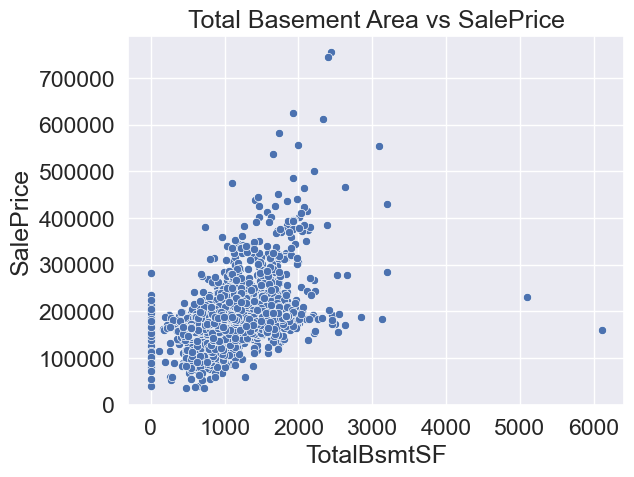

In [44]:
#scatter plot TotalBsmtSF/SalePrice
#Remove records having TotalBsmtSF >4000SF
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_Ames)
plt.title('Total Basement Area vs SalePrice');

In [45]:
# Dropping outliers after analysing the scatter plots

df_Ames = df_Ames.drop(df_Ames[(df_Ames['TotalBsmtSF']>=4000) & (df_Ames['SalePrice']<300000)].index)

df_Ames = df_Ames.drop(df_Ames[(df_Ames['GrLivArea']>4000) & (df_Ames['SalePrice']<300000)].index)


# Feature Engineering

In [46]:

df_Ames['Remodeled'] = (df_Ames['YearBuilt'] != df_Ames['YearRemodAdd']).astype(int)

In [47]:
df_Ames['Age'] = df_Ames['YrSold'] - df_Ames['YearBuilt']

In [48]:
#Create bathroom features
df_Ames["Total_BathRMs"] = (df_Ames["FullBath"] + (0.5 * df_Ames["HalfBath"]) + 
                               df_Ames["BsmtFullBath"] + (0.5 * df_Ames["BsmtHalfBath"]))

In [49]:
#Create porch features
df_Ames['Total_Porch_SF'] = (df_Ames['OpenPorchSF'] + df_Ames['3SsnPorch'] +df_Ames['EnclosedPorch'] +
                              df_Ames['ScreenPorch'] + df_Ames['WoodDeckSF'])

In [50]:
#delete porch related columns since we have total porch square feet
cols = ["OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF"]
df_Ames.drop(columns=cols,inplace=True)

In [51]:
# Creating total sqaure footage
df_Ames['Total_SF_Footage']=(df_Ames['BsmtFinSF1']+df_Ames['BsmtFinSF2']+df_Ames['1stFlrSF']+df_Ames['2ndFlrSF'])

In [52]:

df_Ames['TotalBsmtFinSF'] = df_Ames['BsmtFinSF1'] + df_Ames['BsmtFinSF2']

In [53]:
#dropped BsmtFinSF1&BsmtFinSF2

cols = ["BsmtFinSF2","BsmtFinSF1"]
df_Ames.drop(columns=cols,inplace=True)

In [54]:
df_Ames['YearsSinceRemodel'] = df_Ames['YrSold'] - df_Ames['YearRemodAdd']

In [55]:

df_Ames['BedroomToRoomsRatio'] = df_Ames['BedroomAbvGr'] / df_Ames['TotRmsAbvGrd']

In [56]:

df_Ames['BathRoomToRoomsRatio'] = df_Ames['Total_BathRMs'] / df_Ames['TotRmsAbvGrd']

In [57]:

df_Ames['PricePerSF'] = df_Ames['SalePrice'] / df_Ames['GrLivArea']

df_Ames['PricePerRoom'] = df_Ames['SalePrice'] / df_Ames['TotRmsAbvGrd']

df_Ames['TotalArea'] = df_Ames['LotArea'] + df_Ames['TotalBsmtSF'] + df_Ames['GrLivArea'] + df_Ames['GarageArea']

df_Ames['GarageAge'] = df_Ames['YrSold'] - df_Ames['GarageYrBlt']


In [58]:
#Create new feature for condition by combining condition 1 and condition 2
#Norm means normal which indicates there's no second condition, hence Normal in condition 2 replaced with empty string
Proximity_condition = []
df_Ames["Condition2"] = df_Ames["Condition2"].replace({"Norm": ""})

for val1, val2 in zip(df_Ames["Condition1"], df_Ames["Condition2"]):
    if val2 == "":
        Proximity_condition.append(val1)
    elif val1 == val2:
        Proximity_condition.append(val1)
    else:
        Proximity_condition.append(val1 + val2)

df_Ames["Proximity_condition"] = Proximity_condition


In [59]:

df_Ames.drop(columns=["Condition1","Condition2"],inplace=True)

In [60]:
df_Ames["HeatingQuality"] = df_Ames["Heating"] + "-" + df_Ames["HeatingQC"]

In [61]:
df_Ames.drop(columns=["Heating","HeatingQC"],inplace=True)

In [62]:
#Create boolean features
def boolean_feature(df):
    df["Has2ndFloor"] = (df['2ndFlrSF'] != 0).astype(int)
    df["HasGarage"]  = (df["GarageArea"] !=0).astype(int)
    df["HasBsmt"]    = (df["TotalBsmtSF"]!=0).astype(int)
    df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int) 
    df['HasPool'] = (df['PoolArea'] > 0).astype(int)
    df['HasFence'] = (df['Fence'] != 'NoFen').astype(int)
    df['HasMiscFeature'] = (df['MiscFeature'] != 'None').astype(int)
    df["HasPorch"]=(df["Total_Porch_SF"]!=0).astype(int)
    df["Has_Normal_Proximity"] = (df["Proximity_condition"] == "Norm").astype(int)


In [63]:
boolean_feature(df_Ames)

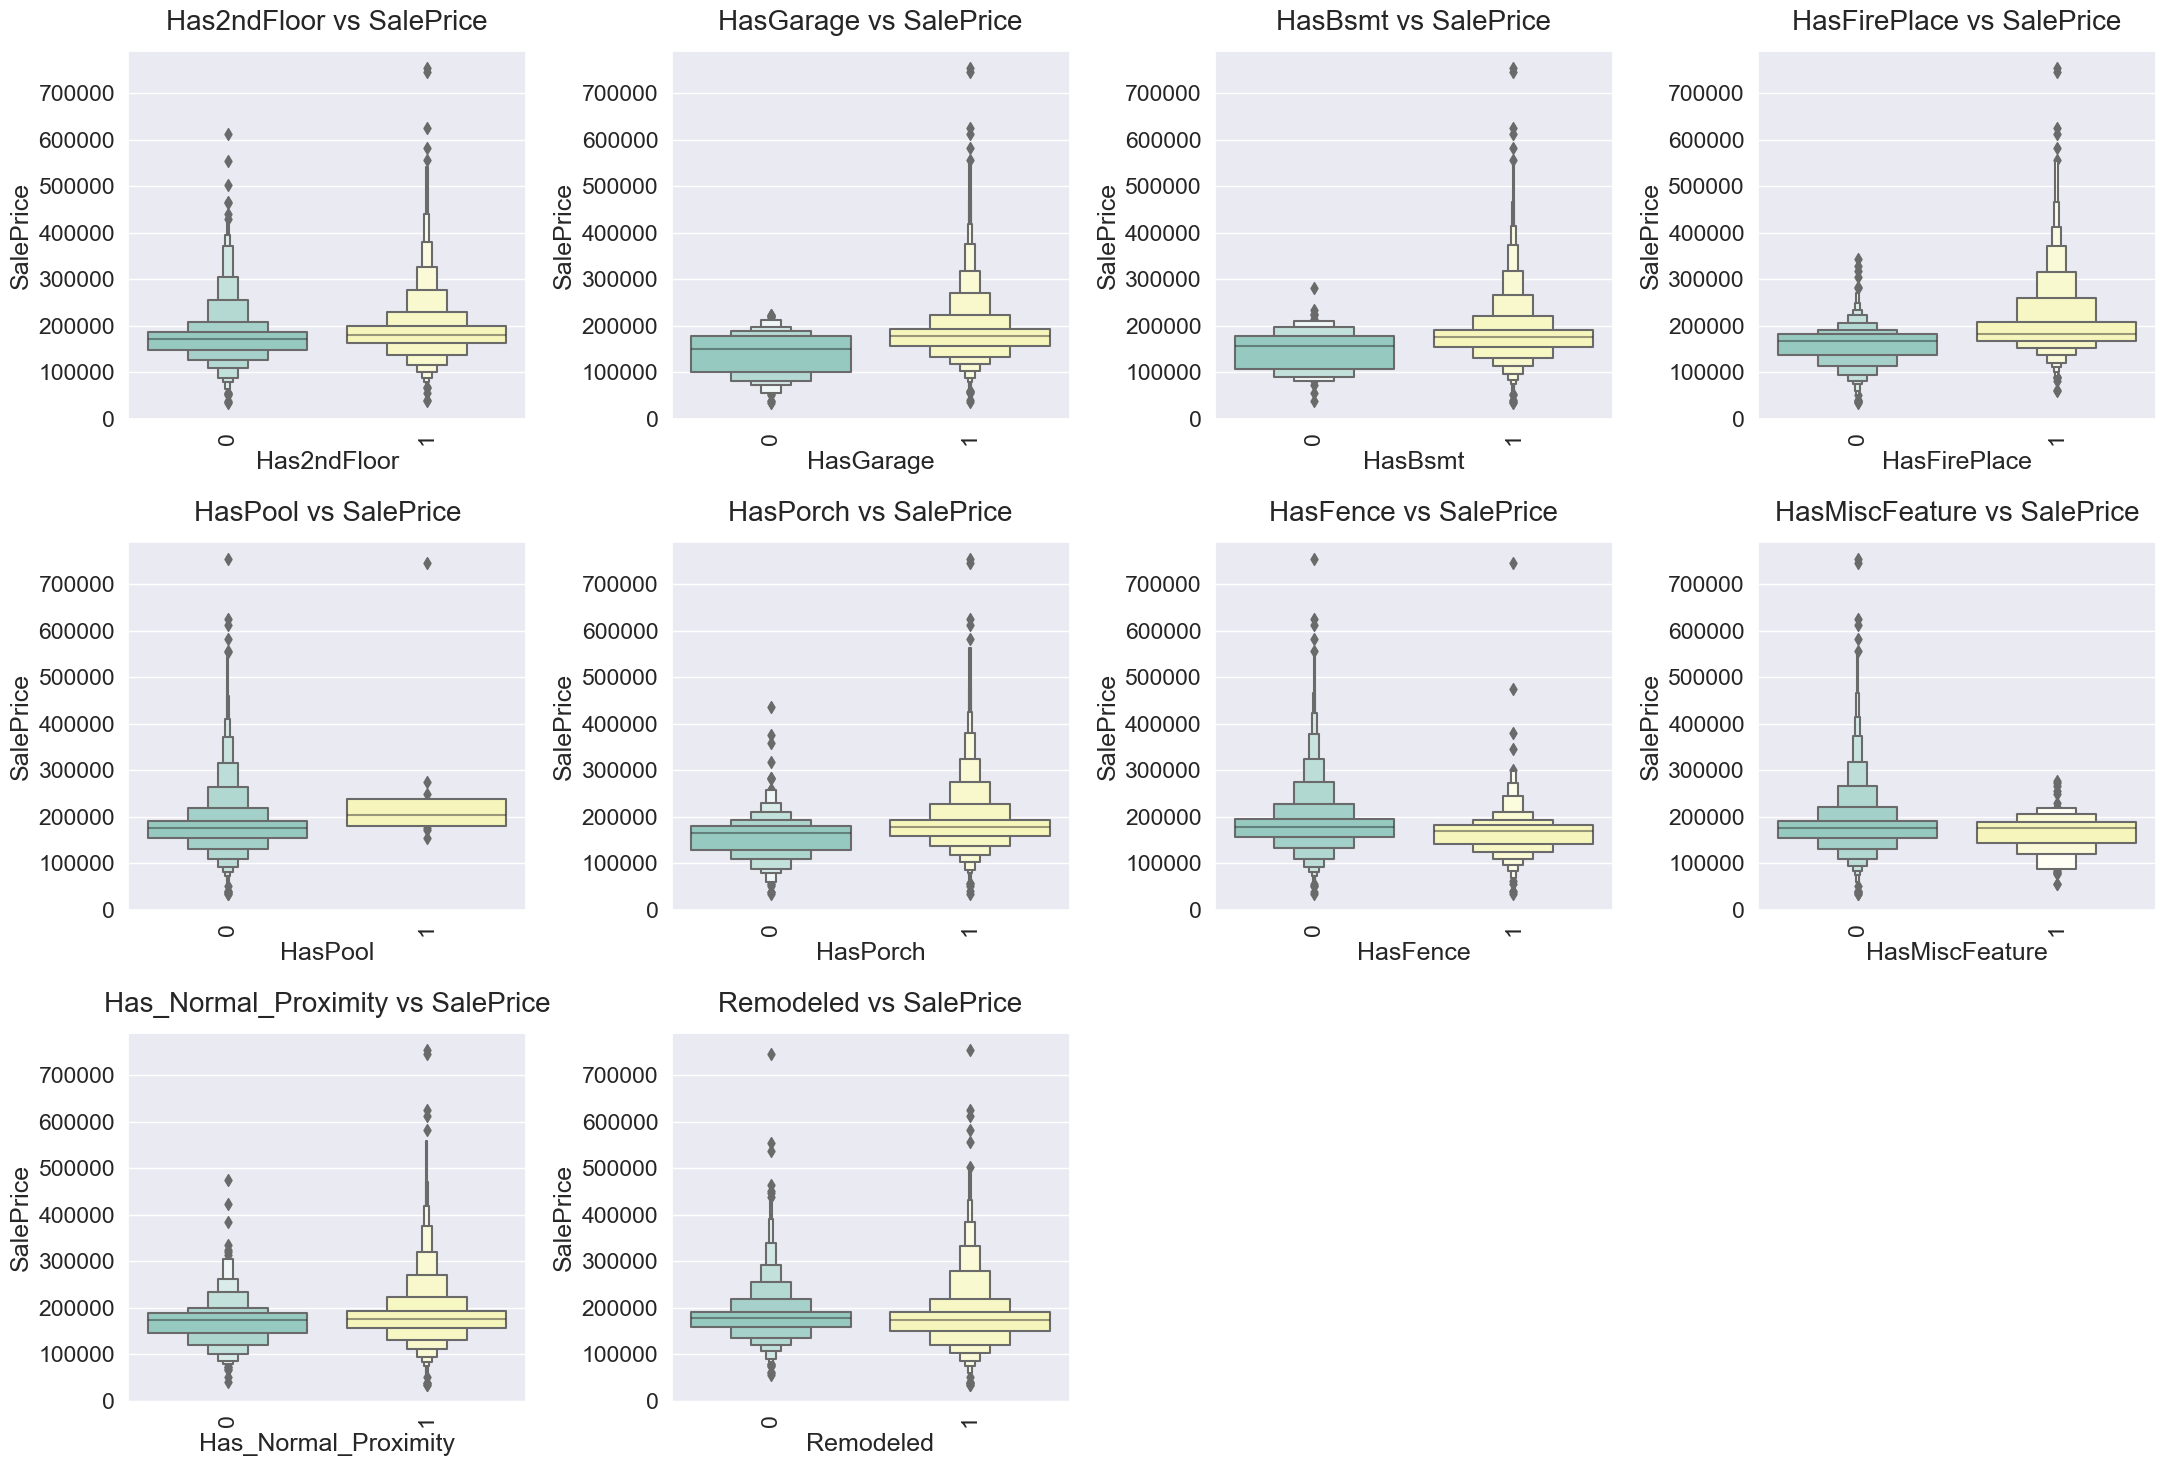

In [64]:
#Visualisng all these boolean features
plt.figure(figsize=(22,15))
for index,column in enumerate(["Has2ndFloor","HasGarage","HasBsmt","HasFirePlace","HasPool",
                               "HasPorch","HasFence","HasMiscFeature","Has_Normal_Proximity","Remodeled"]):
    plt.subplot(3,4,index+1)
    sns.boxenplot(x=column, y="SalePrice", data=df_Ames, palette="Set3")
    plt.title(f"{column} vs SalePrice",pad=15,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('Booleanfeatures.jpg')

In [65]:
#Display only numerical variables 
numerical_features = df_Ames.select_dtypes(include=['int64', 'float64'])
numerical_features.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2918
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2916 non-null   int64  
 1   MSSubClass            2916 non-null   int64  
 2   LotFrontage           2916 non-null   float64
 3   LotArea               2916 non-null   int64  
 4   OverallQual           2916 non-null   int64  
 5   OverallCond           2916 non-null   int64  
 6   YearBuilt             2916 non-null   int64  
 7   YearRemodAdd          2916 non-null   int64  
 8   MasVnrArea            2916 non-null   float64
 9   BsmtUnfSF             2916 non-null   float64
 10  TotalBsmtSF           2916 non-null   float64
 11  1stFlrSF              2916 non-null   int64  
 12  2ndFlrSF              2916 non-null   int64  
 13  LowQualFinSF          2916 non-null   int64  
 14  GrLivArea             2916 non-null   int64  
 15  BsmtFullBath         

In [66]:

#Dropping Id as it is no longer needed
df_Ames.drop(columns="Id",inplace=True)


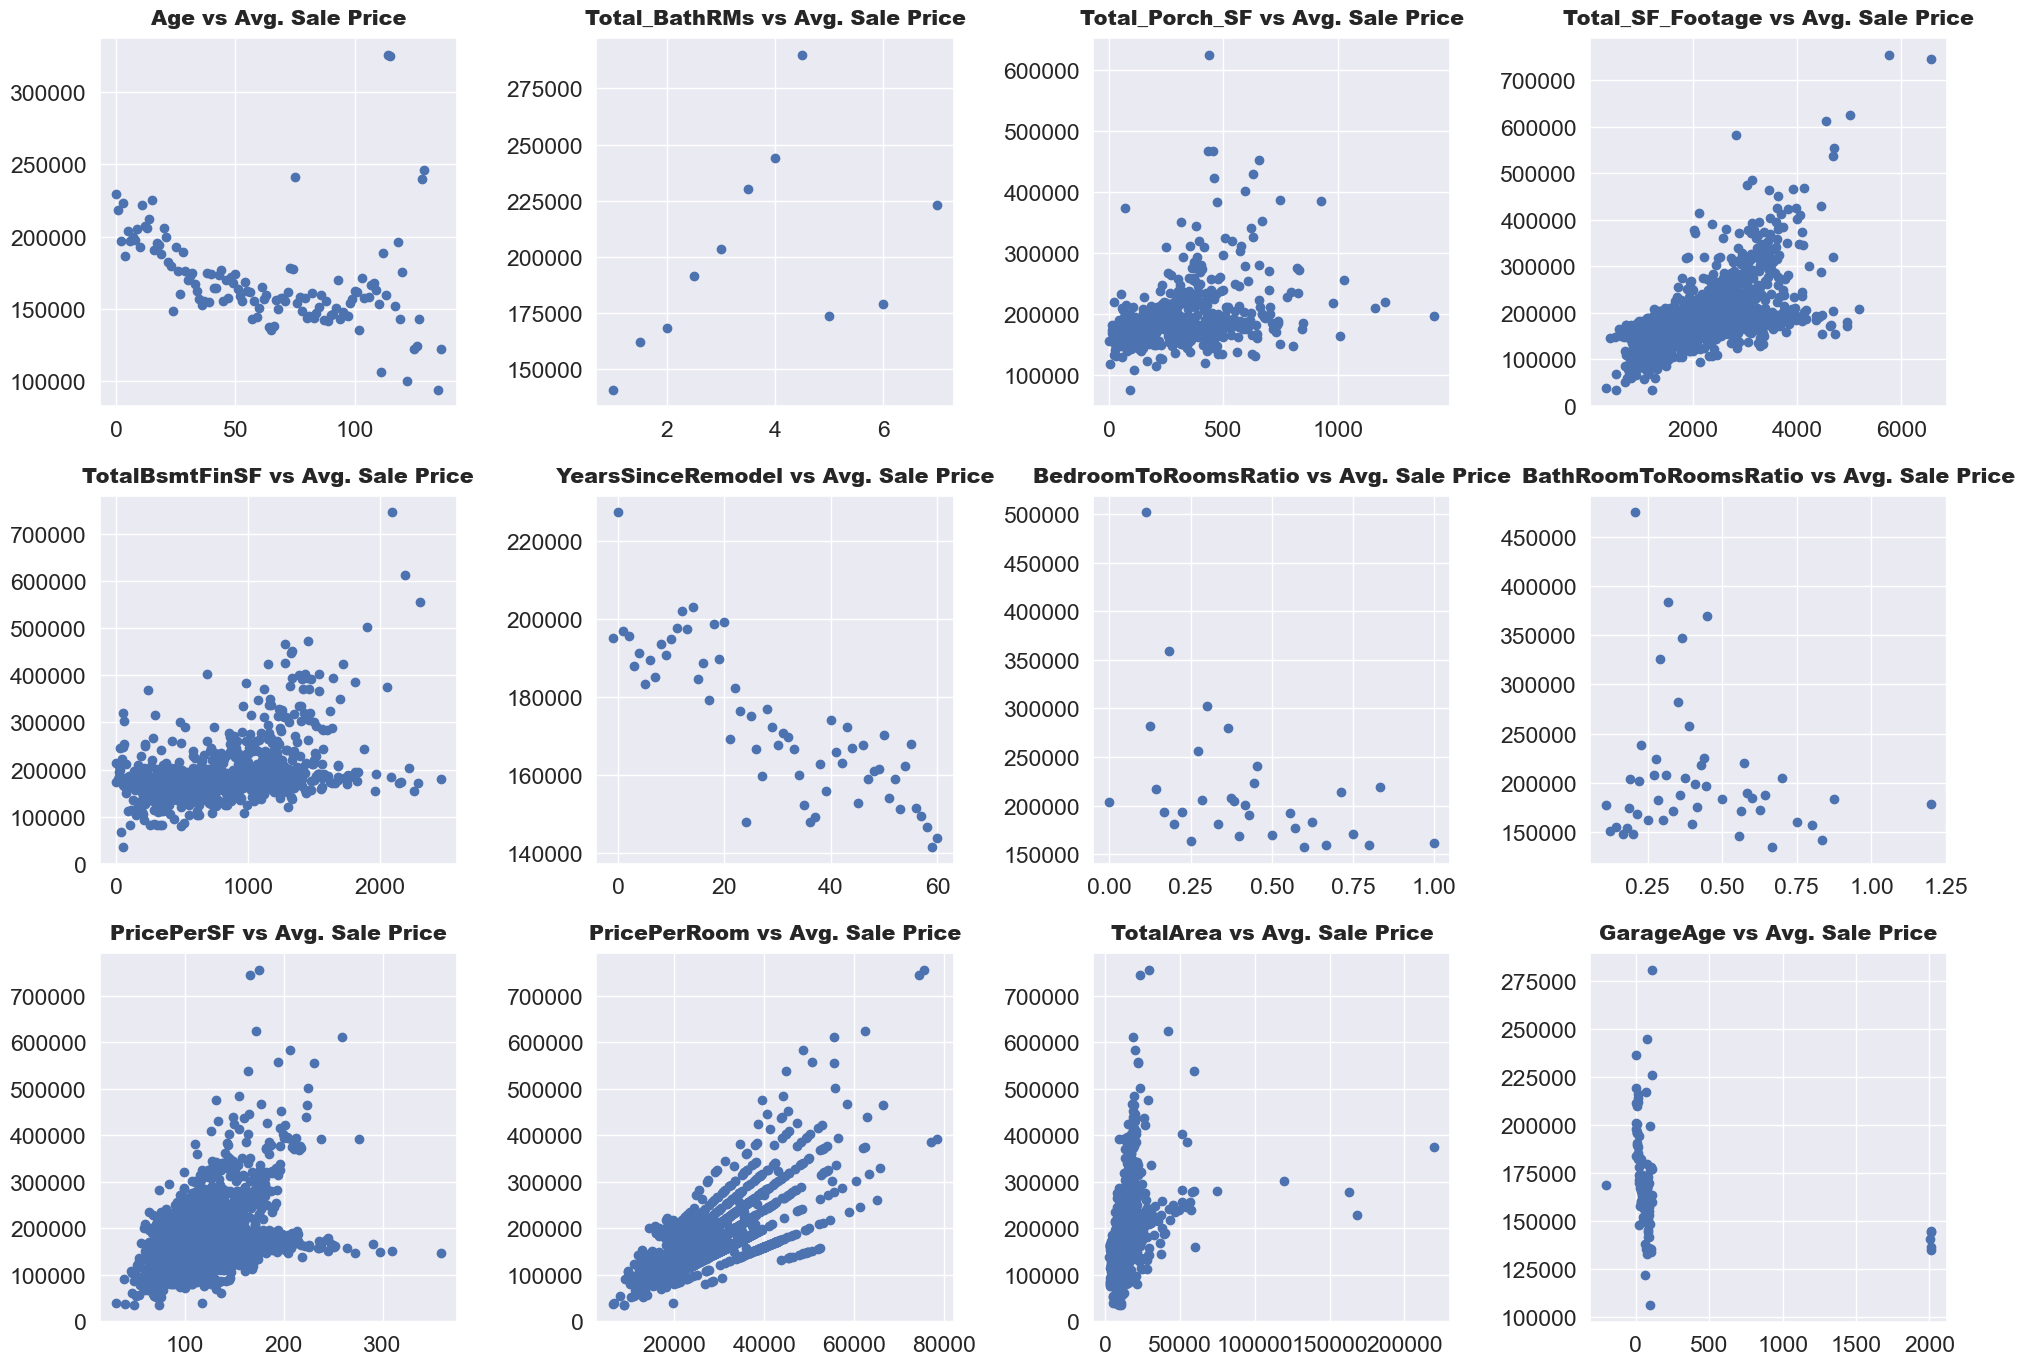

In [67]:
# Visualising new features created

New_cols = ["Age", "Total_BathRMs", "Total_Porch_SF", "Total_SF_Footage",
            "TotalBsmtFinSF", "YearsSinceRemodel", "BedroomToRoomsRatio", "BathRoomToRoomsRatio",
            "PricePerSF", "PricePerRoom", "TotalArea", "GarageAge"]

target_variable = 'SalePrice'
num_cols = len(New_cols)
num_rows = math.ceil(num_cols / 4) 
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 14))  

for index, column in enumerate(New_cols):
    row = index // 4
    col = index % 4
    ax = axes[row, col]
    
    data = df_Ames.groupby(column)[target_variable].mean()
    ax.scatter(x=data.index, y=data)
    ax.set_title(f"{column} vs Avg. Sale Price", fontweight="black", size=15, pad=10)
    
# Remove any remaining empty subplots
for i in range(num_cols, num_rows * 4):
    ax = axes.flatten()[i]
    ax.axis('off')

plt.tight_layout()
plt.savefig('Newfeatures.jpg')
plt.show()

# Feature Selection

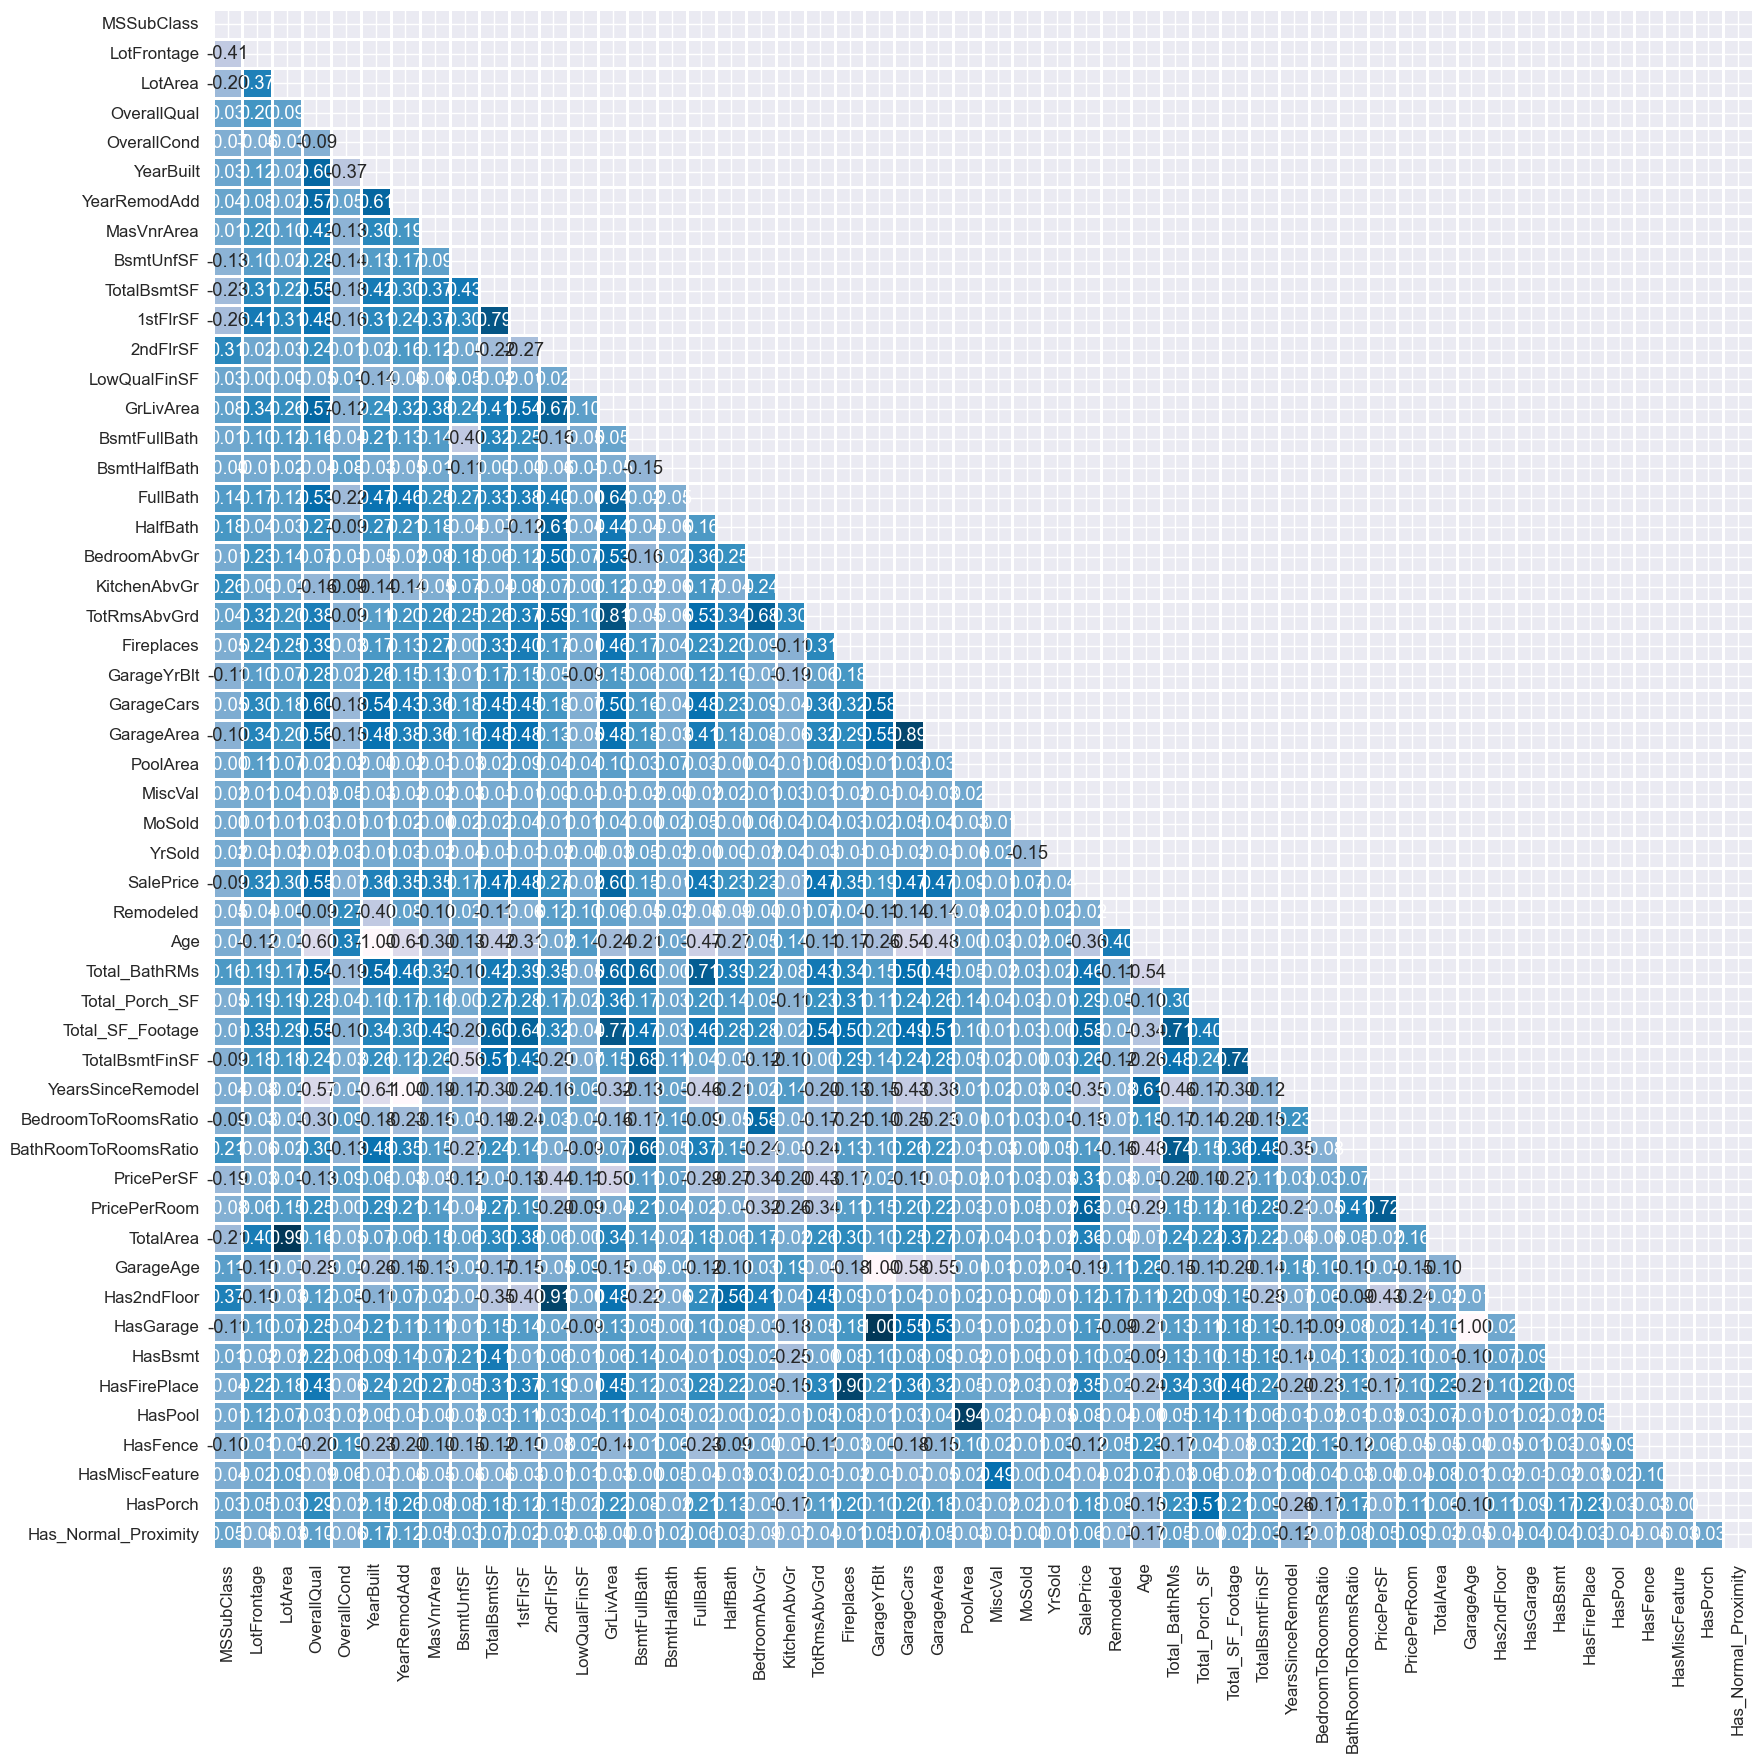

In [68]:
#Correlation Analysis
# Display numerical correlations (pearson) between features on heatmap.
Numeric_features=df_Ames.select_dtypes(include=[np.number])
sns.set(font_scale=1.1)
correlation= Numeric_features.corr()
mask = np.triu(correlation.corr())
plt.figure(figsize=(20, 20))
heatmap=sns.heatmap(correlation,
            annot=True,
            fmt='.2f',
            cmap='PuBu',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()
heatmap.get_figure().savefig('heatmap_correlation.png',bbox_inches='tight')

<Axes: >

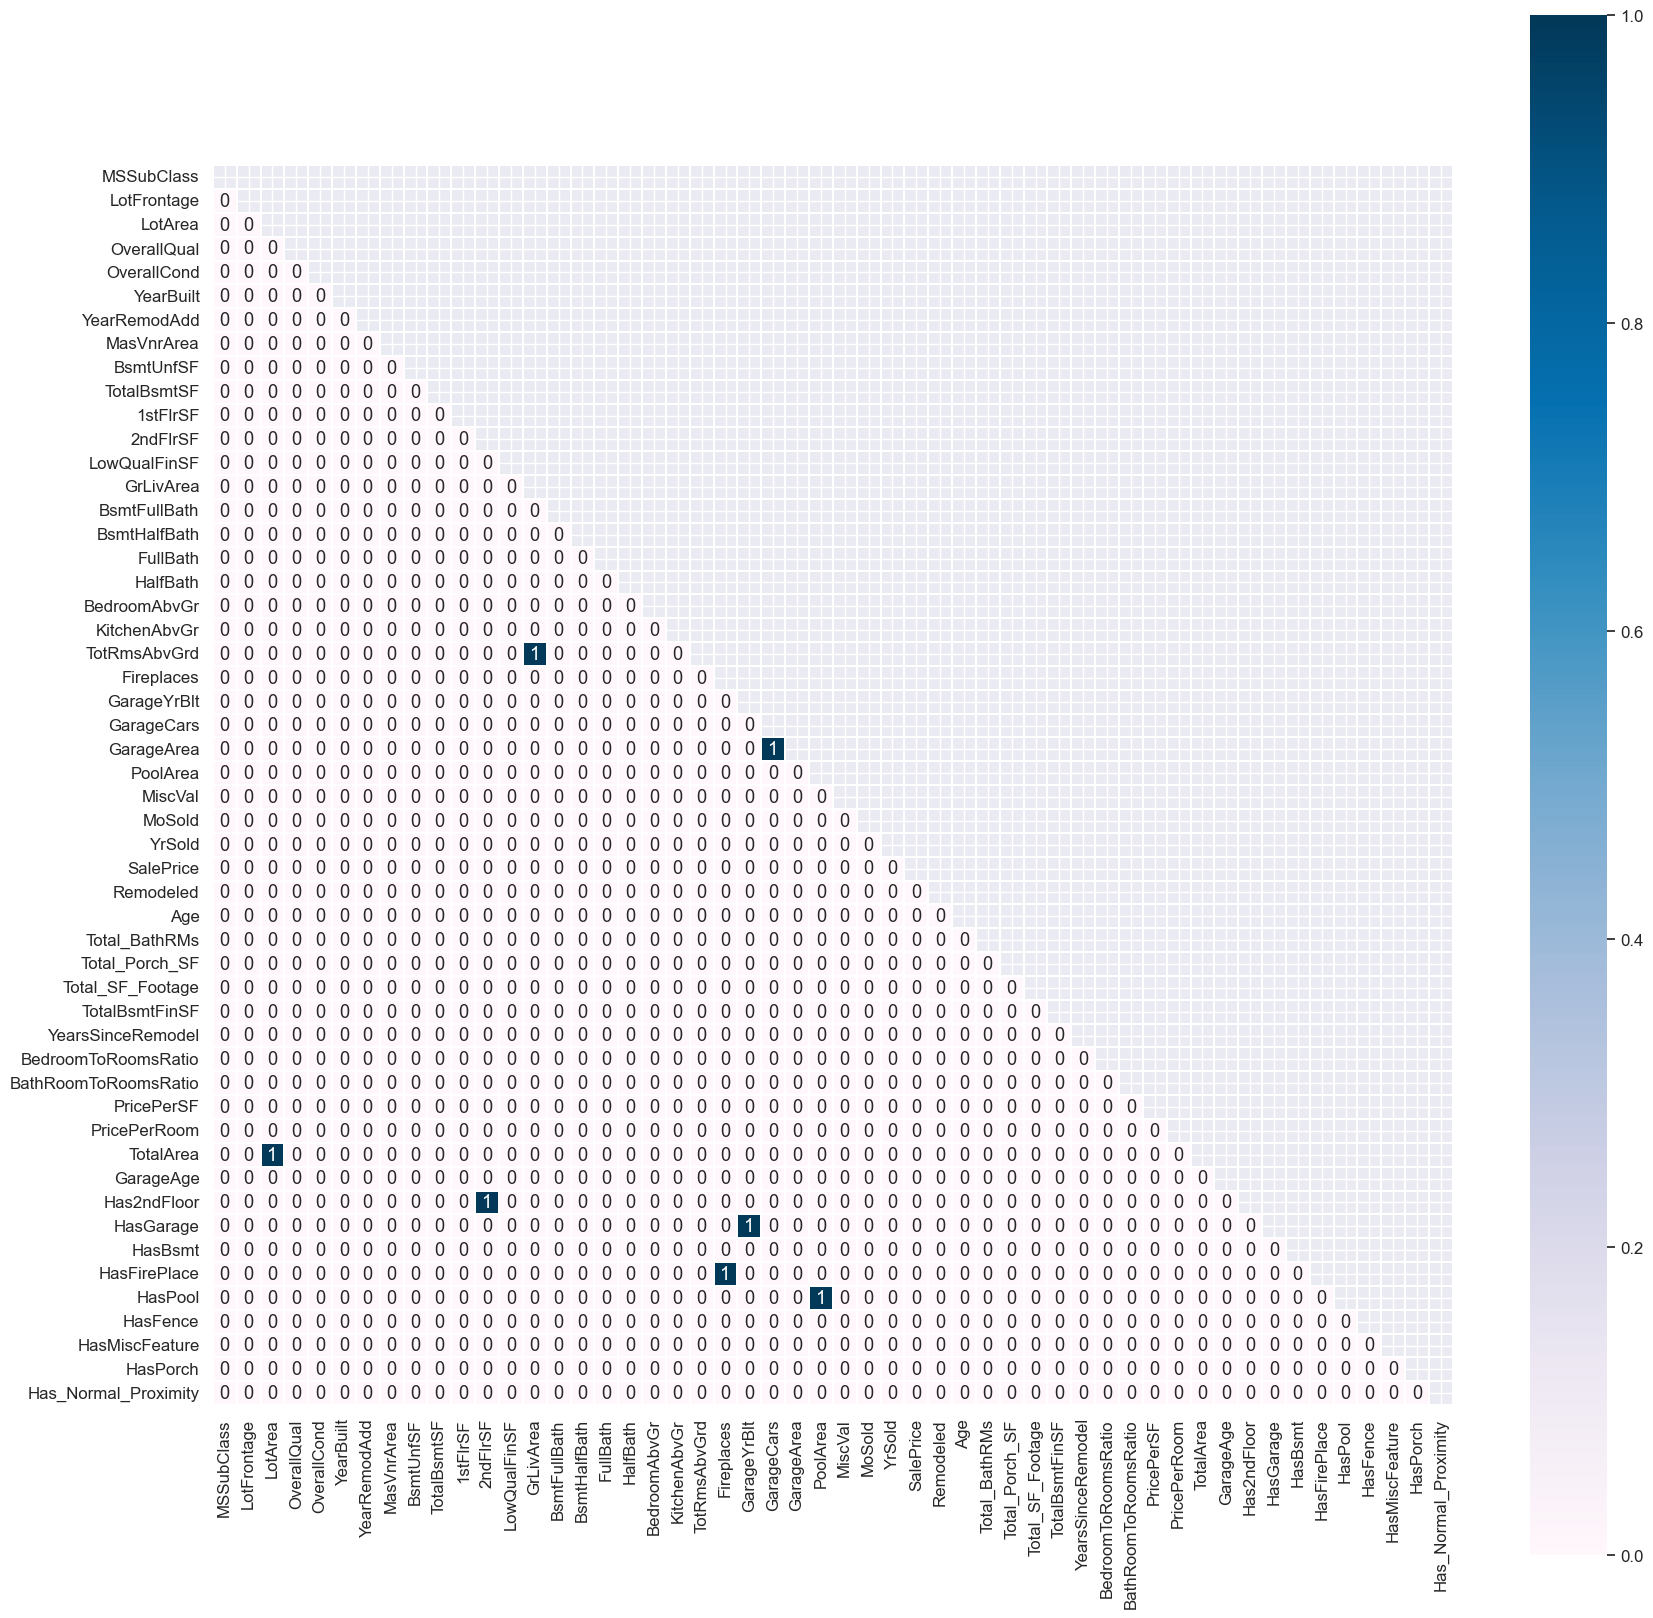

In [69]:
# Highlight features which has correlation greater than 0.8
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation>=0.8, annot=True, square=True, cmap="PuBu",  mask=mask,linewidth='.1')

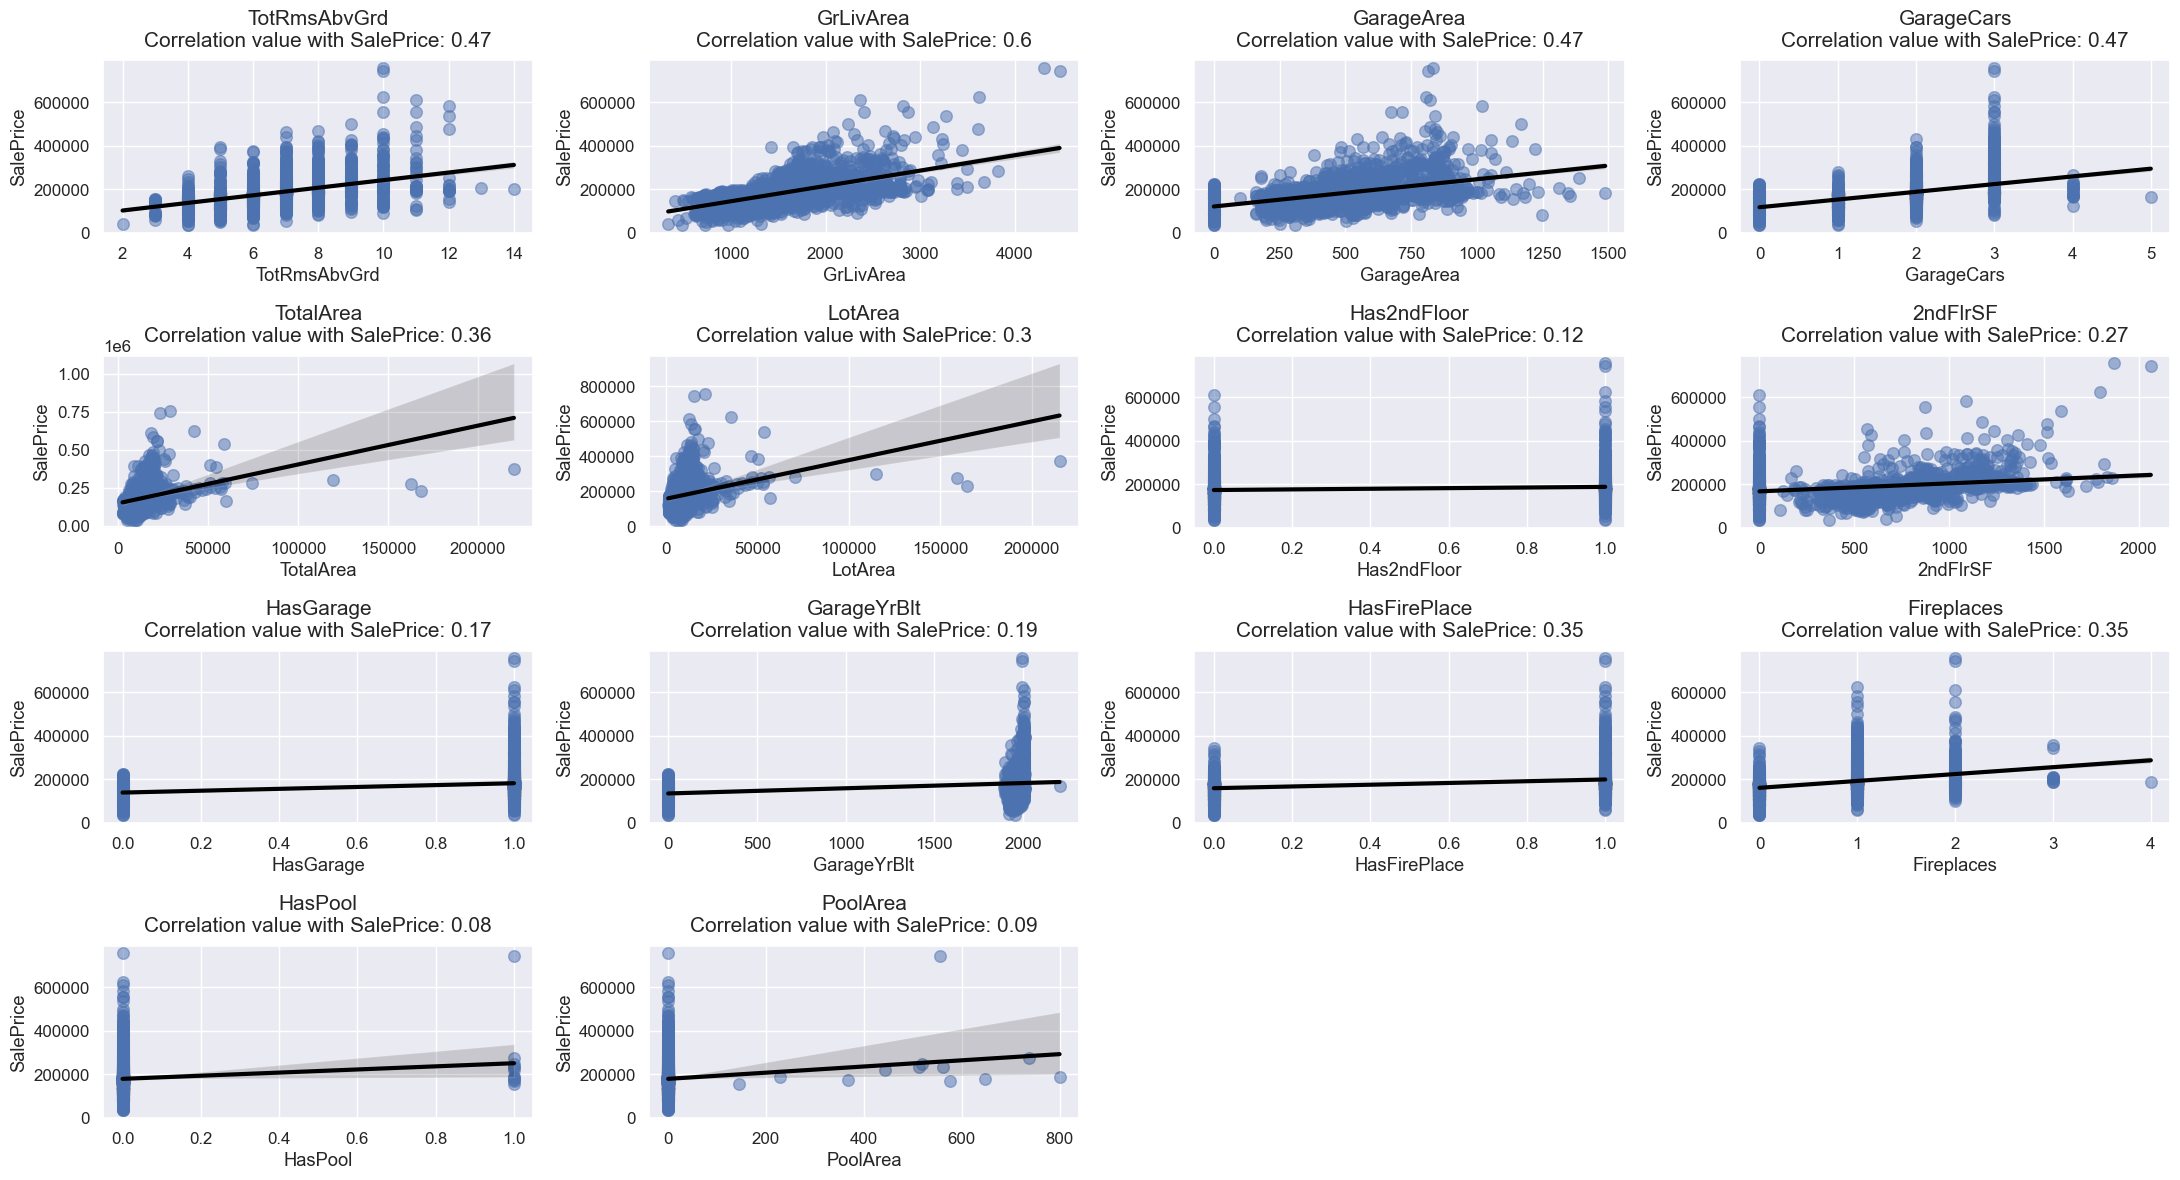

In [70]:
#Visualisation of highly correlated features with Sale Price
cols = ["TotRmsAbvGrd", "GrLivArea", "GarageArea", "GarageCars","TotalArea","LotArea","Has2ndFloor","2ndFlrSF",
        "HasGarage","GarageYrBlt","HasFirePlace","Fireplaces","HasPool","PoolArea"]

plt.figure(figsize=(22, 12))
for index, column in enumerate(cols):
    plt.subplot(4, 4, index + 1)
    sns.regplot(x=df_Ames[column], y=df_Ames["SalePrice"], scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'black', 'lw': 3})
    corr = round(df_Ames[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"{column}\nCorrelation value with SalePrice: {corr}", pad=10, size=15)
    plt.tight_layout()
plt.savefig('correlationwithSalePrice.jpg',bbox_inches='tight')
plt.show()


In [71]:
#Dropping columns as part of correlation Matrix
columns_to_drop = ["GarageArea", "TotRmsAbvGrd","LotArea","HasGarage","HasFirePlace","Has2ndFloor","HasPool"]
df_Ames.drop(columns=columns_to_drop, inplace=True)

# Feature Transformation

In [72]:
#Display the skewness of the target variable.

skewness_saleprice = df_Ames['SalePrice'].skew()

print("Skewness of 'SalePrice':", skewness_saleprice)

Skewness of 'SalePrice': 2.549546942047716


In [73]:
#Since the SalePrice is positively skewed, apply Box-Cox transformation
transformed_data, lambda_param = stats.boxcox(df_Ames['SalePrice'])
df_Ames['SalePrice'] = transformed_data
df_Ames['SalePrice'].skew()

0.02510432915460833

Text(0.5, 1.0, 'SalePrice after  transformation ')

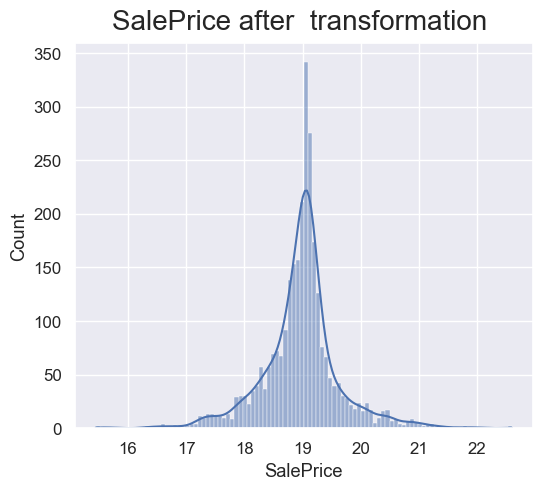

In [74]:
#Plot sales price distribution graph after box-cox transformation
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(df_Ames["SalePrice"],kde=True)
plt.title("SalePrice after  transformation ",size=20,pad=10)


In [75]:
#checkeing skewness of numerical variables
numerical_features = df_Ames.select_dtypes(include=['int64', 'float64'])
numerical_features.skew().sort_values()

GarageYrBlt             -3.935063
YearBuilt               -0.599217
YearRemodAdd            -0.449965
GarageCars              -0.218473
BedroomToRoomsRatio     -0.214660
SalePrice                0.025104
YrSold                   0.131520
FullBath                 0.166265
OverallQual              0.185863
MoSold                   0.198114
BedroomAbvGr             0.326180
TotalBsmtSF              0.413219
YearsSinceRemodel        0.449234
Total_BathRMs            0.486400
OverallCond              0.569107
Age                      0.598067
BsmtFullBath             0.623687
TotalBsmtFinSF           0.676475
HalfBath                 0.698077
Fireplaces               0.725993
PricePerSF               0.789253
BathRoomToRoomsRatio     0.811401
2ndFlrSF                 0.861482
BsmtUnfSF                0.921323
1stFlrSF                 0.952349
GrLivArea                0.972414
Total_SF_Footage         1.000244
PricePerRoom             1.065380
LotFrontage              1.103079
Total_Porch_SF

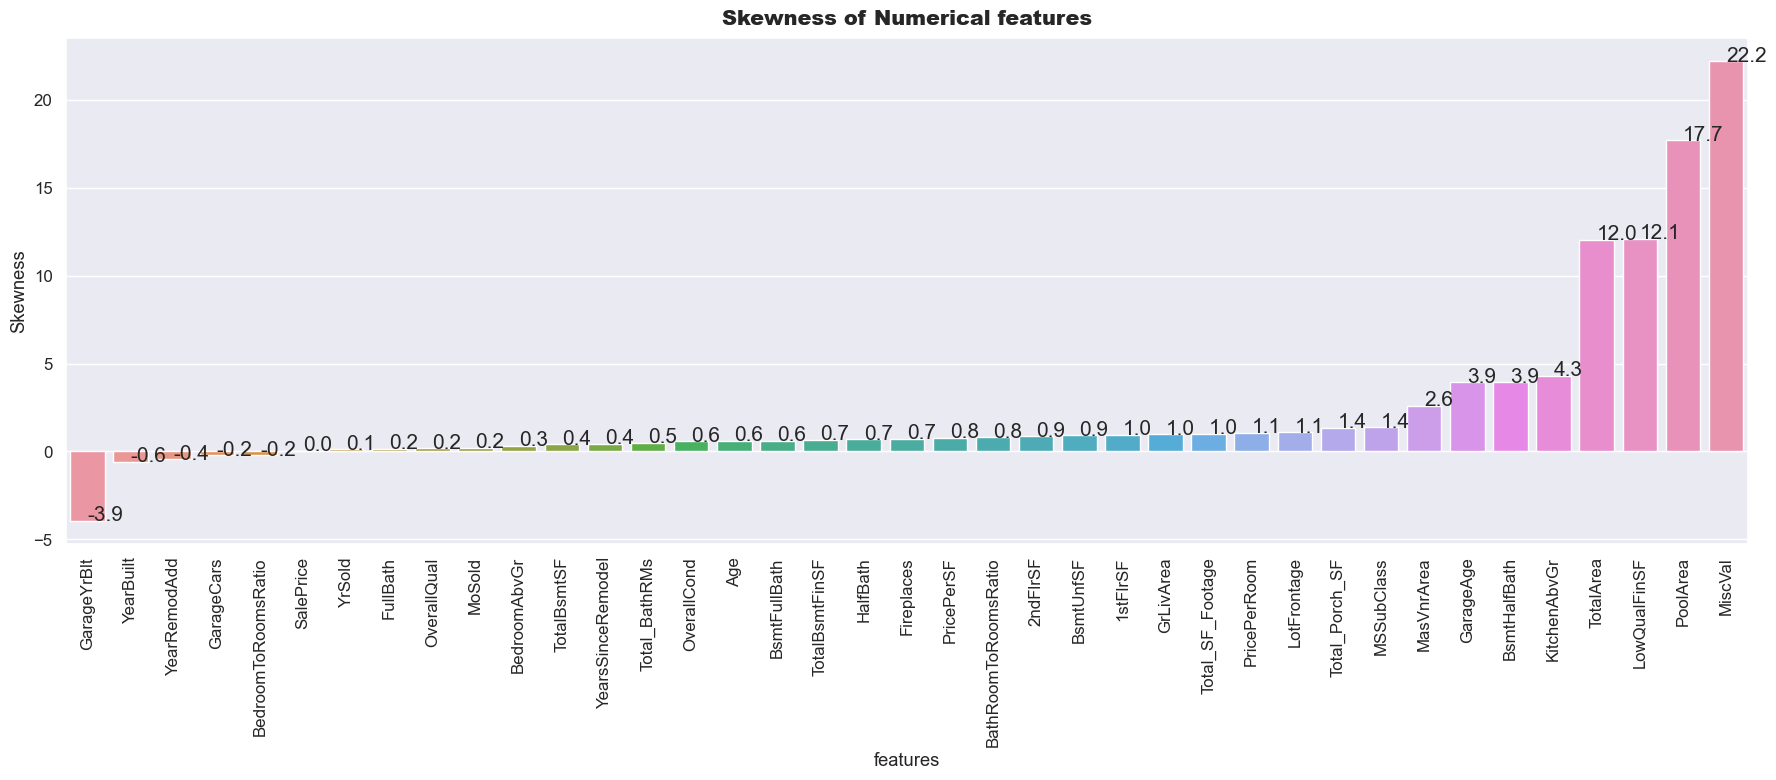

In [76]:
skewness = numerical_features.skew().sort_values()

plt.figure(figsize=(18,8))
sns.barplot(x=skewness.index, y=skewness)
for i, v in enumerate(skewness):
    plt.text(i, v, f"{v:.1f}",size=15)

plt.ylabel("Skewness")
plt.xlabel("features")
plt.xticks(rotation=90)
plt.title("Skewness of Numerical features",fontweight="black",size=15,pad=10)
plt.savefig('SkewnessNumerical.jpg',bbox_inches='tight')
plt.tight_layout()
plt.show()

In [77]:
#dropping features exhibiting high skewness
cols = ["LowQualFinSF","PoolArea","MiscVal"]
df_Ames.drop(columns=cols, inplace=True)


In [78]:
df_Ames.head(10)

MSSubClass MSZoning  LotFrontage    Alley LotShape LandContour LotConfig  \
0          60       RL         65.0  NoAlley      Reg         Lvl    Inside   
1          20       RL         80.0  NoAlley      Reg         Lvl       FR2   
2          60       RL         68.0  NoAlley      IR1         Lvl    Inside   
3          70       RL         60.0  NoAlley      IR1         Lvl    Corner   
4          60       RL         84.0  NoAlley      IR1         Lvl       FR2   
5          50       RL         85.0  NoAlley      IR1         Lvl    Inside   
6          20       RL         75.0  NoAlley      Reg         Lvl    Inside   
7          60       RL         80.0  NoAlley      IR1         Lvl    Corner   
8          50       RM         51.0  NoAlley      Reg         Lvl    Inside   
9         190       RL         50.0  NoAlley      Reg         Lvl    Corner   

  LandSlope Neighborhood BldgType HouseStyle  OverallQual  OverallCond  \
0       Gtl      CollgCr     1Fam     2Story            7            5   
1       Gtl      Veenker     1Fam     1Story            6            8   
2       Gtl      CollgCr     1Fam     2Story            7            5   
3       Gtl      Crawfor     1Fam     2Story            7            5   
4       Gtl      NoRidge     1Fam     2Story            8            5   
5       Gtl      Mitchel     1Fam     1.5Fin            5            5   
6       Gtl      Somerst     1Fam     1Story            8            5   
7       Gtl       NWAmes     1Fam     2Story            7            6   
8       Gtl      OldTown     1Fam     1.5Fin            7            5   
9       Gtl      BrkSide   2fmCon     1.5Unf            5            6   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0       2003          2003     Gable     VinylSd     VinylSd    BrkFace   
1       1976          1976     Gable     MetalSd     MetalSd       None   
2       2001          2002     Gable     VinylSd     VinylSd    BrkFace   
3       1915          1970     Gable     Wd Sdng     Wd Shng       None   
4       2000          2000     Gable     VinylSd     VinylSd    BrkFace   
5       1993          1995     Gable     VinylSd     VinylSd       None   
6       2004          2005     Gable     VinylSd     VinylSd      Stone   
7       1973          1973     Gable     HdBoard     HdBoard      Stone   
8       1931          1950     Gable     BrkFace     Wd Shng       None   
9       1939          1950     Gable     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9         0.0        TA        TA     BrkTil       TA       TA           No   

  BsmtFinType1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF CentralAir Electrical  \
0          GLQ          Unf      150.0        856.0          Y      SBrkr   
1          ALQ          Unf      284.0       1262.0          Y      SBrkr   
2          GLQ          Unf      434.0        920.0          Y      SBrkr   
3          ALQ          Unf      540.0        756.0          Y      SBrkr   
4          GLQ          Unf      490.0       1145.0          Y      SBrkr   
5          GLQ          Unf       64.0        796.0          Y      SBrkr   
6          GLQ          Unf      317.0       1686.0          Y      SBrkr   
7     

In [79]:
#Performing Target Encoding on Categorical Features with High Cardinality

cols = ["Neighborhood", "Exterior1st", "Exterior2nd", "HeatingQuality"]

for column in cols:
    encoder = TargetEncoder(cols=[column], min_samples_leaf=20, smoothing=10)
    df_Ames[column] = encoder.fit_transform(df_Ames[column], df_Ames["SalePrice"])

# Display the resulting encoded DataFrame
print(df_Ames[cols])


      Neighborhood  Exterior1st  Exterior2nd  HeatingQuality
0        19.158413    19.199345    19.202784       19.194861
1        19.202643    18.760467    18.773289       19.194861
2        19.158413    19.199345    19.202784       19.194861
3        19.217874    18.766386    18.815672       18.831064
4        19.929193    19.199345    19.202784       19.194861
...            ...          ...          ...             ...
2914     18.381313    19.137817    19.133702       18.831064
2915     18.381313    19.137817    19.133702       18.732036
2916     18.920601    19.199345    19.202784       19.194861
2917     18.920601    18.901458    18.815672       18.732036
2918     18.920601    18.901458    18.922552       19.194861

[2916 rows x 4 columns]


In [80]:

#Performing Label Encoding on below Features

cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond","FireplaceQu","Proximity_condition"]

encoder = LabelEncoder()

df_Ames[cols] = df_Ames[cols].apply(encoder.fit_transform)


In [81]:
#Apply  One-Hot Encoding on Nominal Categorical Columns
cols = df_Ames.select_dtypes(include="object").columns

df_Ames_copy=df_Ames

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df_Ames, columns=cols, prefix=cols, prefix_sep='_')


In [82]:
df_Ames_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            2916 non-null   int64  
 1   MSZoning              2916 non-null   object 
 2   LotFrontage           2916 non-null   float64
 3   Alley                 2916 non-null   object 
 4   LotShape              2916 non-null   object 
 5   LandContour           2916 non-null   object 
 6   LotConfig             2916 non-null   object 
 7   LandSlope             2916 non-null   object 
 8   Neighborhood          2916 non-null   float64
 9   BldgType              2916 non-null   object 
 10  HouseStyle            2916 non-null   int32  
 11  OverallQual           2916 non-null   int64  
 12  OverallCond           2916 non-null   int64  
 13  YearBuilt             2916 non-null   int64  
 14  YearRemodAdd          2916 non-null   int64  
 15  RoofStyle            

In [83]:
df_encoded.shape


(2916, 170)

In [84]:
df_Ames=df_encoded

In [85]:
X = df_Ames.drop(columns=["SalePrice"])
y = df_Ames["SalePrice"]

In [86]:
# Use MinMaxScaler to scale the features (X) only
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [88]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (2332, 169)
Dimension of x_test:=> (584, 169)
Dimension of y_train:=> (2332,)
Dimension of y_test:=> (584,)


# Modeling

In [89]:
# Create List of Model metrics
R2_value = []
MAE_value = []
MSE_value = []
RMSE_value = []

In [90]:
#Apply-Model function for learning and prediction
def apply_model(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Metrics Calculation.
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    MAE_value.append(mae)
    MSE_value.append(mse)
    RMSE_value.append(rmse)
    R2_value.append(r2)

    print(f"R2 Score of the {model} model is=>",r2)
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)

    # Scatter plot of true values Vs actual values.
    plt.figure(figsize=(10, 5))
    plt.scatter(y_train, y_train_pred, color='black', label='Train')
    plt.scatter(y_test, y_test_pred, color='blue', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('True values Vs Predicted values', size=20, pad=10)
    plt.show()


R2 Score of the LinearRegression() model is=> 0.94343657921204
MAE of LinearRegression() model is=> 0.11308264548157054
MSE of LinearRegression() model is=> 0.030734545358212895
RMSE of LinearRegression() model is=> 0.1753127073495042


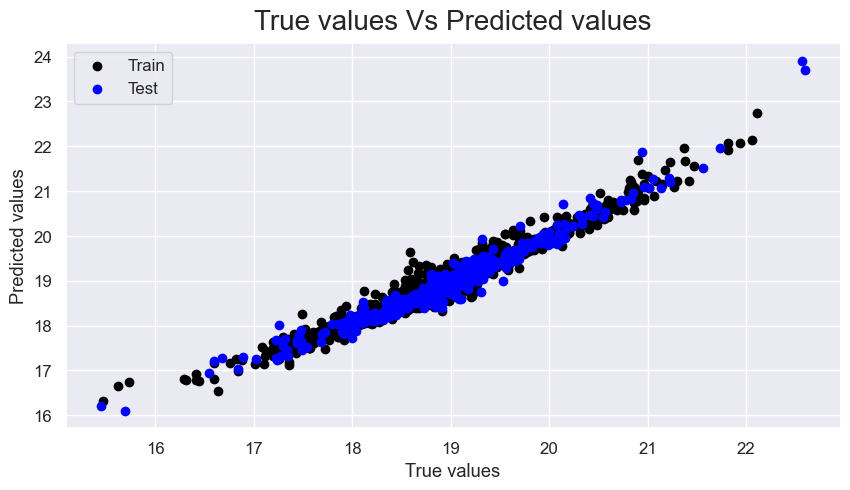

In [91]:
apply_model(LinearRegression())

R2 Score of the RandomForestRegressor() model is=> 0.9643563704605821
MAE of RandomForestRegressor() model is=> 0.06662458536868664
MSE of RandomForestRegressor() model is=> 0.019367476958602917
RMSE of RandomForestRegressor() model is=> 0.1391670828845777


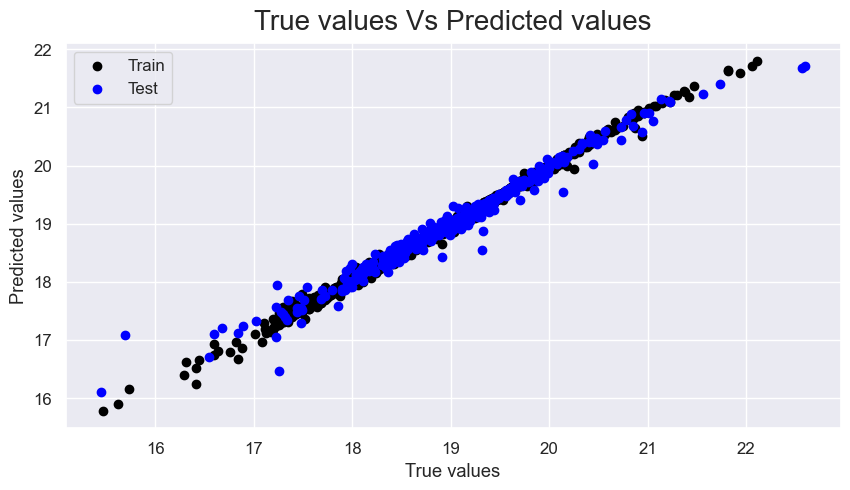

In [92]:
apply_model(RandomForestRegressor())

R2 Score of the DecisionTreeRegressor() model is=> 0.8971782526029559
MAE of DecisionTreeRegressor() model is=> 0.12963246460969527
MSE of DecisionTreeRegressor() model is=> 0.0558696701006073
RMSE of DecisionTreeRegressor() model is=> 0.2363676587450307


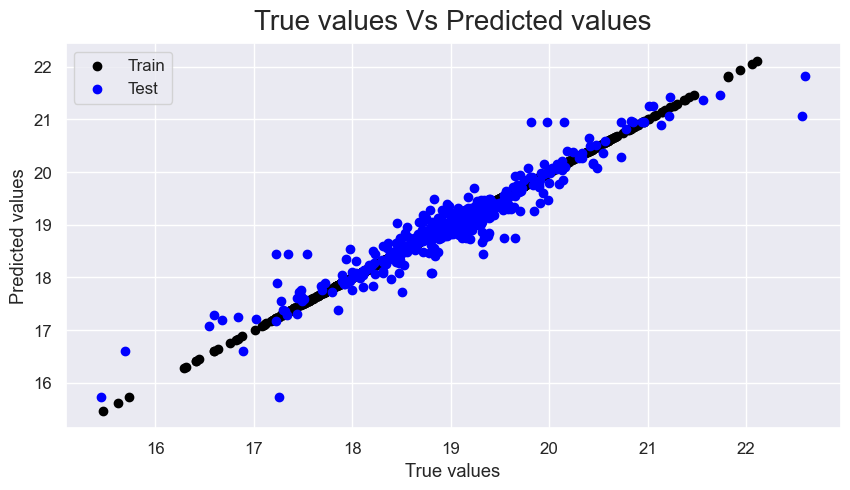

In [93]:
from sklearn.tree import DecisionTreeRegressor
apply_model(DecisionTreeRegressor())

R2 Score of the SVR() model is=> 0.8633913331678046
MAE of SVR() model is=> 0.18176558623253872
MSE of SVR() model is=> 0.07422827701348665
RMSE of SVR() model is=> 0.2724486685845366


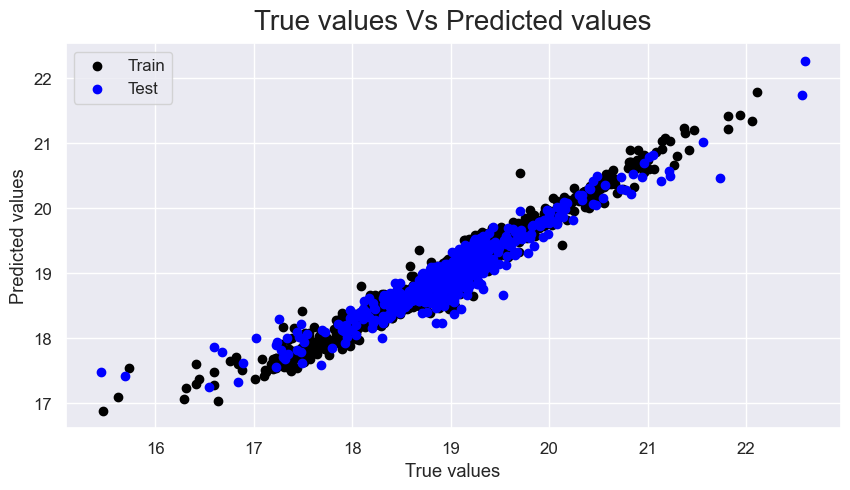

In [94]:
apply_model(SVR())

R2 Score of the AdaBoostRegressor() model is=> 0.8683682053635265
MAE of AdaBoostRegressor() model is=> 0.19360063416521348
MSE of AdaBoostRegressor() model is=> 0.07152402217686958
RMSE of AdaBoostRegressor() model is=> 0.26743975429406447


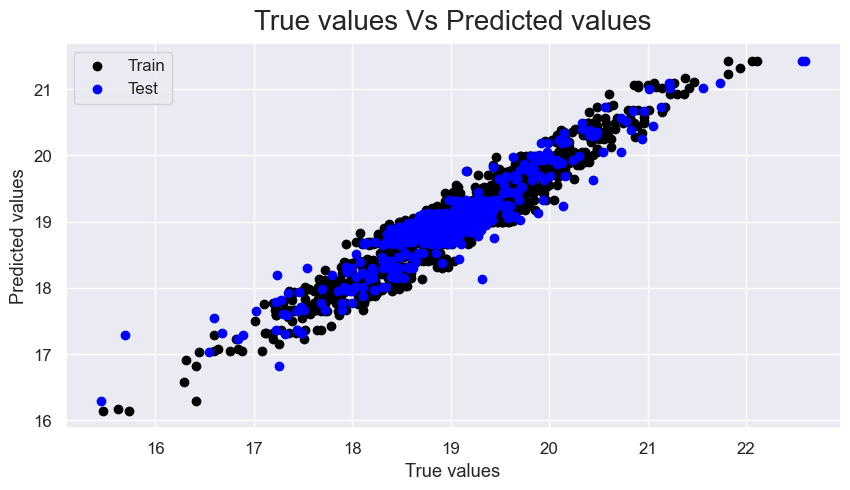

In [95]:
apply_model(AdaBoostRegressor())

R2 Score of the <catboost.core.CatBoostRegressor object at 0x00000203B1EFF910> model is=> 0.9867843673442963
MAE of <catboost.core.CatBoostRegressor object at 0x00000203B1EFF910> model is=> 0.03598511955534923
MSE of <catboost.core.CatBoostRegressor object at 0x00000203B1EFF910> model is=> 0.0071809034113555995
RMSE of <catboost.core.CatBoostRegressor object at 0x00000203B1EFF910> model is=> 0.08474021130110308


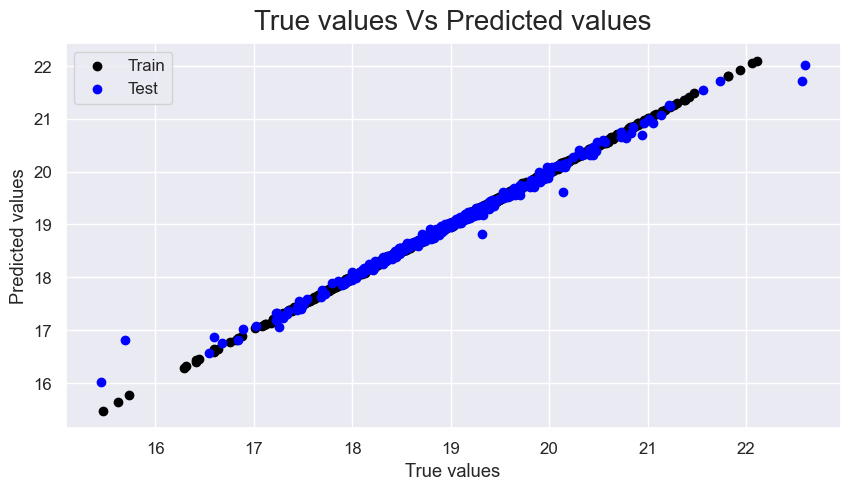

In [96]:
apply_model(CatBoostRegressor(verbose=False))

# Summary of the Models

In [97]:

Models = [" Multiple Linear Regression","Random Forest Regresor","Decision Tree Regressor","Support Vector Regressor",
         "AdaBoostRegressor","CatBoostRegressor"]

results_df = pd.DataFrame({"Model":Models,"R2_Score":R2_value,
                       "MAE":MAE_value,"MSE":MSE_value,"RMSE":RMSE_value})
results_df

Model  R2_Score       MAE       MSE      RMSE
0   Multiple Linear Regression  0.943437  0.113083  0.030735  0.175313
1       Random Forest Regresor  0.964356  0.066625  0.019367  0.139167
2      Decision Tree Regressor  0.897178  0.129632  0.055870  0.236368
3     Support Vector Regressor  0.863391  0.181766  0.074228  0.272449
4            AdaBoostRegressor  0.868368  0.193601  0.071524  0.267440
5            CatBoostRegressor  0.986784  0.035985  0.007181  0.084740

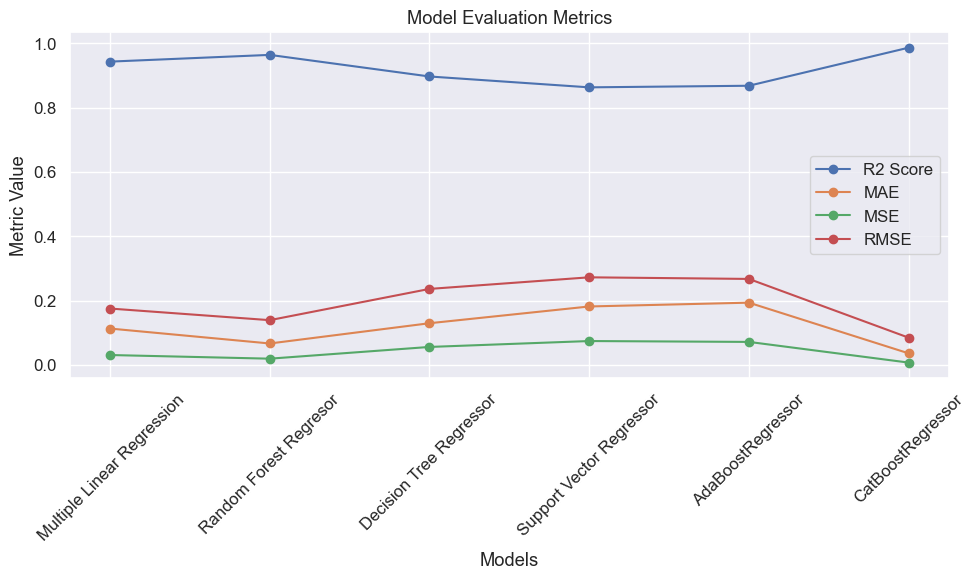

In [98]:
# Create a line graph for each metric
plt.figure(figsize=(10, 6))

plt.plot(results_df["Model"], results_df["R2_Score"], marker='o', label='R2 Score')
plt.plot(results_df["Model"], results_df["MAE"], marker='o', label='MAE')
plt.plot(results_df["Model"], results_df["MSE"], marker='o', label='MSE')
plt.plot(results_df["Model"], results_df["RMSE"], marker='o', label='RMSE')

plt.xlabel("Models")
plt.ylabel("Metric Value")
plt.title("Model Evaluation Metrics")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('ModelEvaluationResults.jpg',bbox_inches='tight')
plt.tight_layout()
plt.show()



<Axes: title={'center': 'SalePrice Correlation Matrix'}>

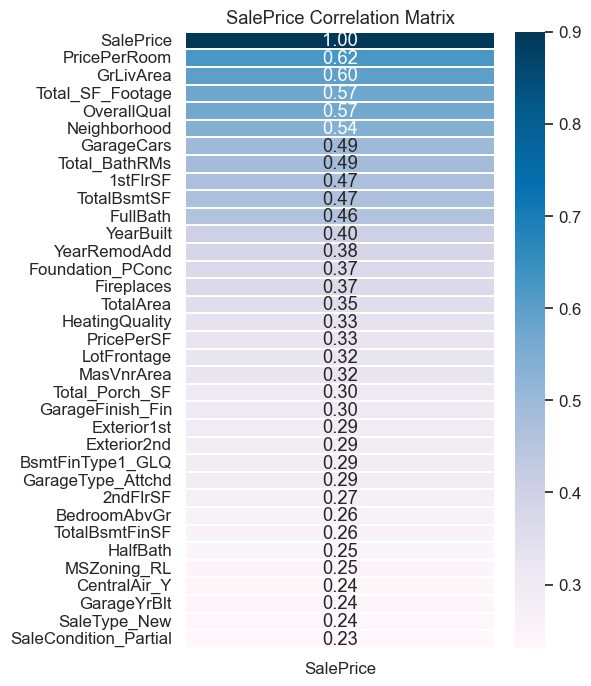

In [99]:
# Plot the most correlated variables to Sale Price as a matrix
Numeric_features=df_Ames.select_dtypes(include=[np.number])
correlation= Numeric_features.corr()
imp_ftr = correlation['SalePrice'].sort_values(ascending=False).head(35).to_frame()
plt.subplots(figsize=(5,8))
plt.title('SalePrice Correlation Matrix')
sns.heatmap(imp_ftr, vmax=0.9, annot=True, fmt='.2f', cmap="PuBu", linewidth='.1')